# Project 2 - Car Insurance Claim Prediction

## 5.1 Software/Library Installation 

•	Python Website, https://www.python.org/   
•	Project Jupyter Website, https://jupyter.org/   
•	NumPy Website, https://numpy.org/   
•	SciPy Website, https://www.scipy.org/  
•	Pandas Website, https://pandas.pydata.org/  
•	Scikit-Learn Website, https://scikit-learn.org/  
•	MatPlotLib Website, https://matplotlib.org/  
•	Seaborn Website, https://seaborn.pydata.org/  


Let's start by reading the data into a pandas DataFrame.


In [65]:
import pandas as pd
data = pd.read_csv('data/train.csv')

print(data.head())
data.info(verbose = True)

  policy_id  policy_tenure  age_of_car  age_of_policyholder area_cluster  \
0   ID00001       0.515874        0.05             0.644231           C1   
1   ID00002       0.672619        0.02             0.375000           C2   
2   ID00003       0.841110        0.02             0.384615           C3   
3   ID00004       0.900277        0.11             0.432692           C4   
4   ID00005       0.596403        0.11             0.634615           C5   

   population_density  make segment model fuel_type  ... is_brake_assist  \
0                4990     1       A    M1       CNG  ...              No   
1               27003     1       A    M1       CNG  ...              No   
2                4076     1       A    M1       CNG  ...              No   
3               21622     1      C1    M2    Petrol  ...             Yes   
4               34738     2       A    M3    Petrol  ...              No   

  is_power_door_locks is_central_locking  is_power_steering  \
0                  No  

We can already see that there are no null columns, so we don't need to worry about that.
Also, memory usage is acceptable so we can use all the data in the training set.
<br>
The policy_id column is unique for each object, so it won't be of much help for finding patterns in the data. Furthermore, the policy_ids for the data to which the model will be applied to will be different, so we decided to drop it.

In [66]:
data.drop("policy_id",axis=1,inplace=True)
print(data.head())

   policy_tenure  age_of_car  age_of_policyholder area_cluster  \
0       0.515874        0.05             0.644231           C1   
1       0.672619        0.02             0.375000           C2   
2       0.841110        0.02             0.384615           C3   
3       0.900277        0.11             0.432692           C4   
4       0.596403        0.11             0.634615           C5   

   population_density  make segment model fuel_type     max_torque  ...  \
0                4990     1       A    M1       CNG   60Nm@3500rpm  ...   
1               27003     1       A    M1       CNG   60Nm@3500rpm  ...   
2                4076     1       A    M1       CNG   60Nm@3500rpm  ...   
3               21622     1      C1    M2    Petrol  113Nm@4400rpm  ...   
4               34738     2       A    M3    Petrol   91Nm@4250rpm  ...   

  is_brake_assist is_power_door_locks  is_central_locking is_power_steering  \
0              No                  No                  No               Y

The dataset includes max_torque and max_power in the format 60Nm@3500rpm and 40.36bhp@6000rpm, respectively. Instead of just using one-hot encoding and increasing the dimensionality tremendously, we decided to split each of these two labels into two labels of their own (i.e. 4 labels in total).

In [67]:
data["max_torque_Nm"] = data["max_torque"].str.extract(r"([-+]?[0-9]*\.?[0-9]+)(?=\s*Nm)").astype('float64')
data["max_torque_rpm"] = data["max_torque"].str.extract(r"([-+]?[0-9]*\.?[0-9]+)(?=\s*rpm)").astype('float64')

data["max_power_bhp"] = data["max_power"].str.extract(r"([-+]?[0-9]*\.?[0-9]+)(?=\s*bhp)").astype('float64')
data["max_power_rpm"] = data["max_power"].str.extract(r"([-+]?[0-9]*\.?[0-9]+)(?=\s*rpm)").astype('float64')

#Drop original cols
data.drop(["max_torque","max_power"],axis=1,inplace=True)

print(data.head())

   policy_tenure  age_of_car  age_of_policyholder area_cluster  \
0       0.515874        0.05             0.644231           C1   
1       0.672619        0.02             0.375000           C2   
2       0.841110        0.02             0.384615           C3   
3       0.900277        0.11             0.432692           C4   
4       0.596403        0.11             0.634615           C5   

   population_density  make segment model fuel_type         engine_type  ...  \
0                4990     1       A    M1       CNG   F8D Petrol Engine  ...   
1               27003     1       A    M1       CNG   F8D Petrol Engine  ...   
2                4076     1       A    M1       CNG   F8D Petrol Engine  ...   
3               21622     1      C1    M2    Petrol  1.2 L K12N Dualjet  ...   
4               34738     2       A    M3    Petrol             1.0 SCe  ...   

   is_driver_seat_height_adjustable is_day_night_rear_view_mirror is_ecw  \
0                                No           

A lot of labels were binary but represented as Yes/No rather than 1/0, so we decided to replace Yes with True and No with False, making the column of type boolean rather than String

In [68]:
data = data.replace({ "No" : False , "Yes" : True })
data.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58592 entries, 0 to 58591
Data columns (total 45 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   policy_tenure                     58592 non-null  float64
 1   age_of_car                        58592 non-null  float64
 2   age_of_policyholder               58592 non-null  float64
 3   area_cluster                      58592 non-null  object 
 4   population_density                58592 non-null  int64  
 5   make                              58592 non-null  int64  
 6   segment                           58592 non-null  object 
 7   model                             58592 non-null  object 
 8   fuel_type                         58592 non-null  object 
 9   engine_type                       58592 non-null  object 
 10  airbags                           58592 non-null  int64  
 11  is_esc                            58592 non-null  bool   
 12  is_a

<Axes: xlabel='is_claim', ylabel='count'>

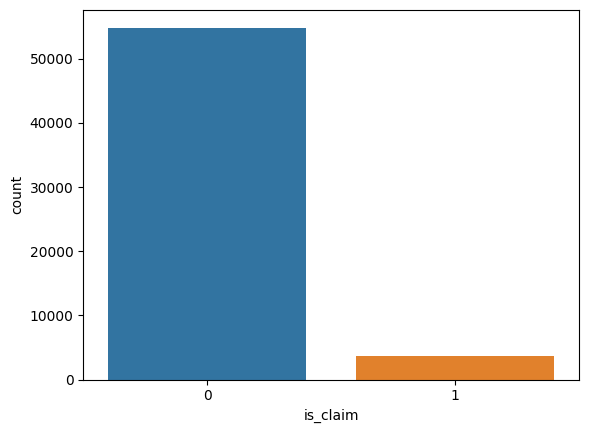

In [69]:
%matplotlib inline
import seaborn as sb
import matplotlib.pyplot as plt
sb.countplot(x='is_claim',data=data)

As we can see, the data is extremely skewed, which means we will need to balance it before applying the algorithms.

/tmp/ipykernel_9046/584675540.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sb.heatmap(data.corr(),annot=True)


<Axes: >

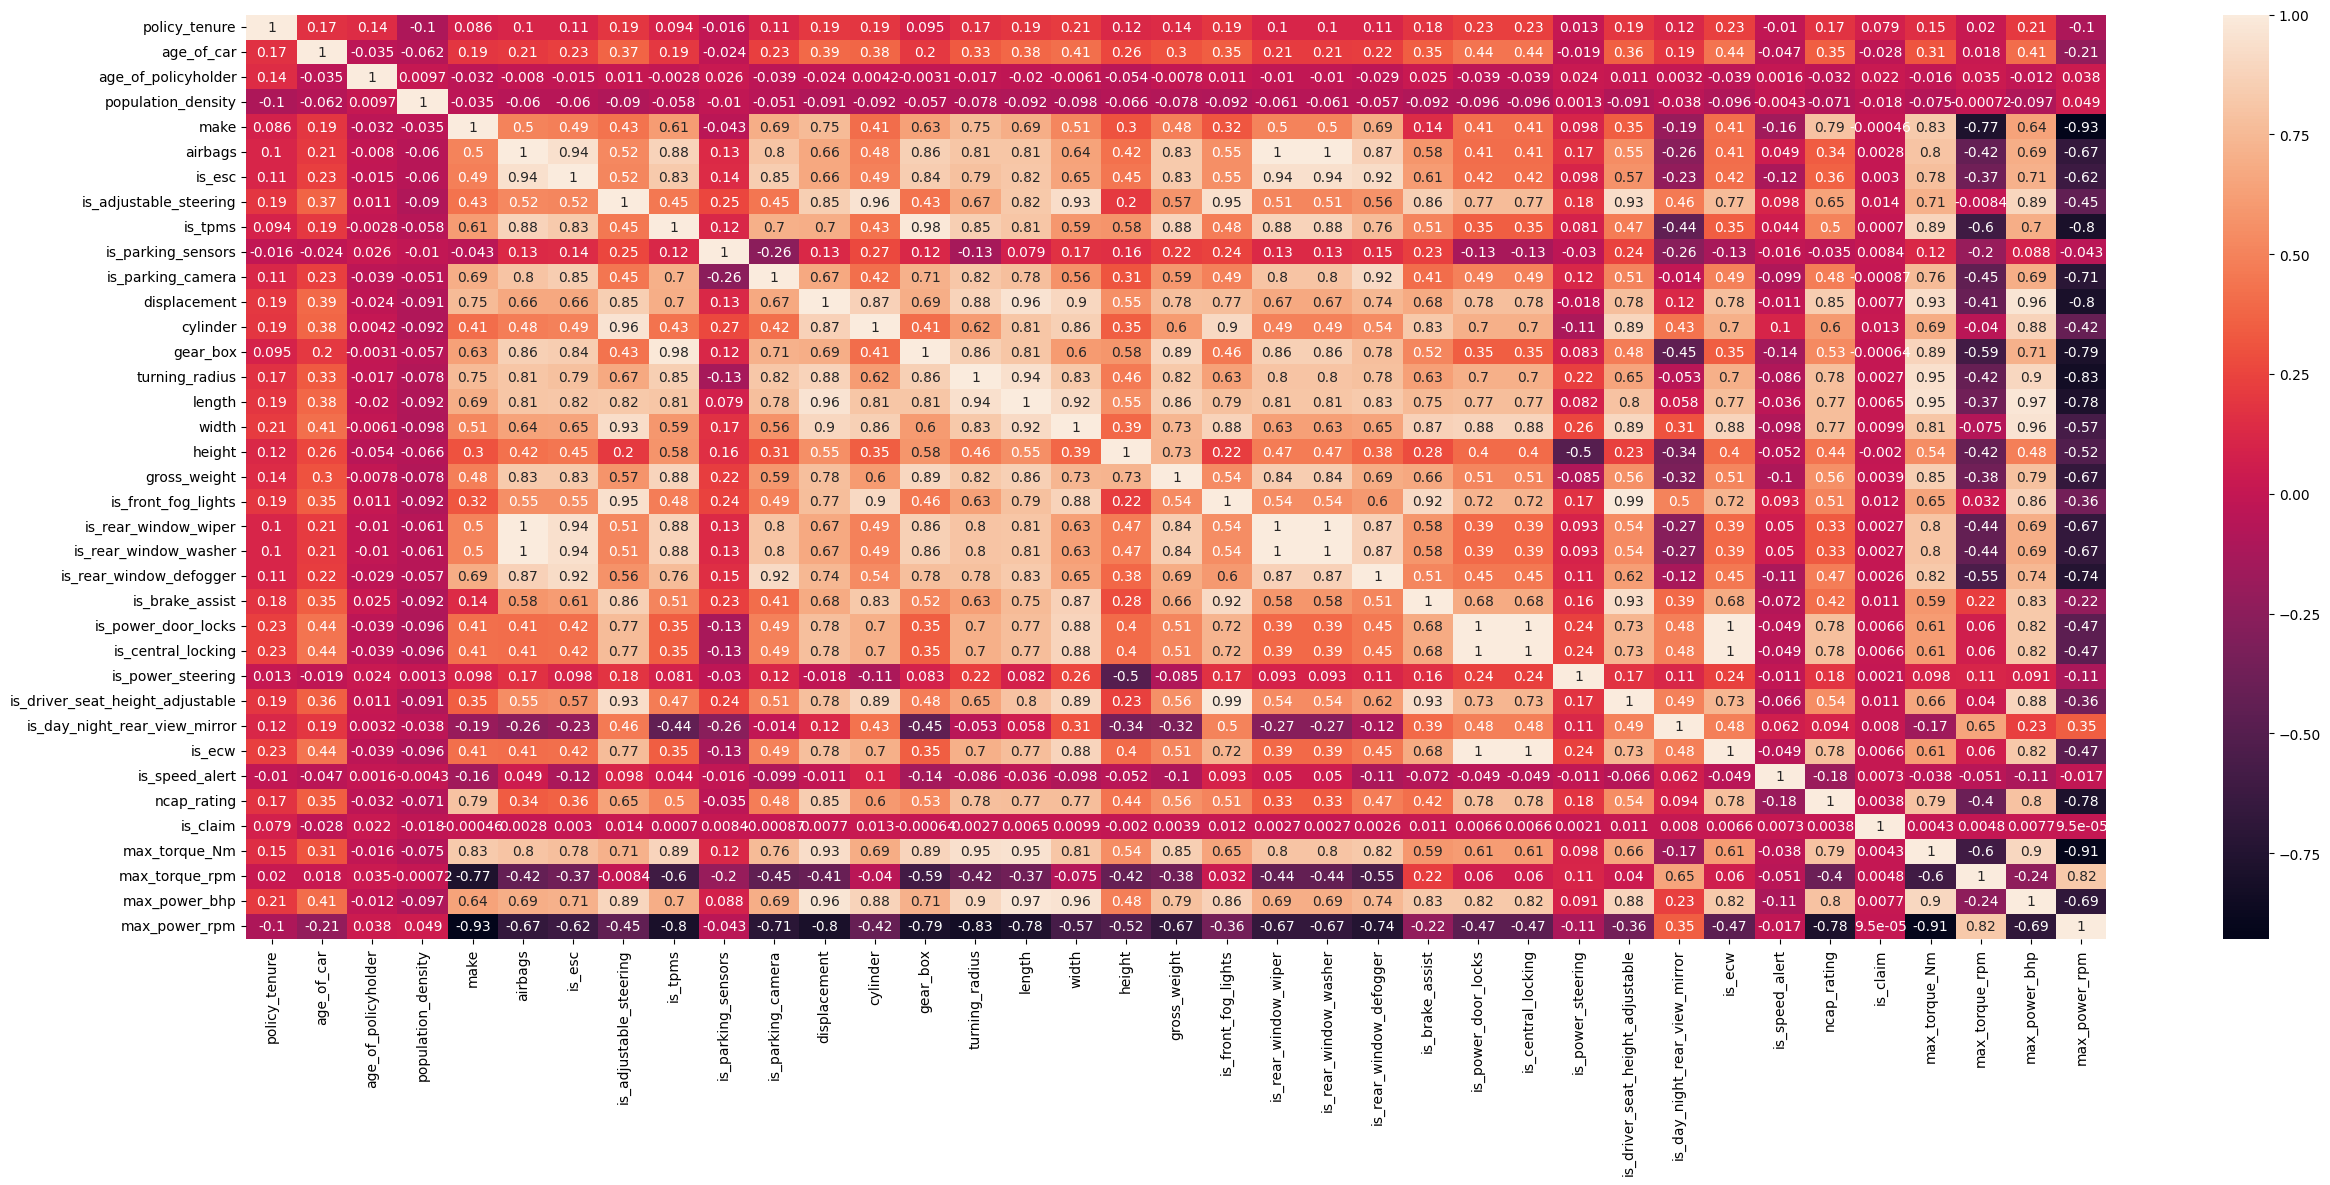

In [70]:
plt.figure(figsize=(30,12))
sb.heatmap(data.corr(),annot=True)


Let's split the attributes into categorical attributes and numerical attributes

In [71]:
cat_list=[]
num_list=[]

for i in data.columns:
    unique_val=len(data[i].unique())
    
    if unique_val<15:
        cat_list.append(i)
    else:
        num_list.append(i)


num_list.remove("area_cluster")
cat_list.append("area_cluster")
print(cat_list)
print(num_list)

['make', 'segment', 'model', 'fuel_type', 'engine_type', 'airbags', 'is_esc', 'is_adjustable_steering', 'is_tpms', 'is_parking_sensors', 'is_parking_camera', 'rear_brakes_type', 'displacement', 'cylinder', 'transmission_type', 'gear_box', 'steering_type', 'turning_radius', 'length', 'width', 'height', 'gross_weight', 'is_front_fog_lights', 'is_rear_window_wiper', 'is_rear_window_washer', 'is_rear_window_defogger', 'is_brake_assist', 'is_power_door_locks', 'is_central_locking', 'is_power_steering', 'is_driver_seat_height_adjustable', 'is_day_night_rear_view_mirror', 'is_ecw', 'is_speed_alert', 'ncap_rating', 'is_claim', 'max_torque_Nm', 'max_torque_rpm', 'max_power_bhp', 'max_power_rpm', 'area_cluster']
['policy_tenure', 'age_of_car', 'age_of_policyholder', 'population_density']


/tmp/ipykernel_9046/3548715098.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(data[i])


<Figure size 800x600 with 0 Axes>

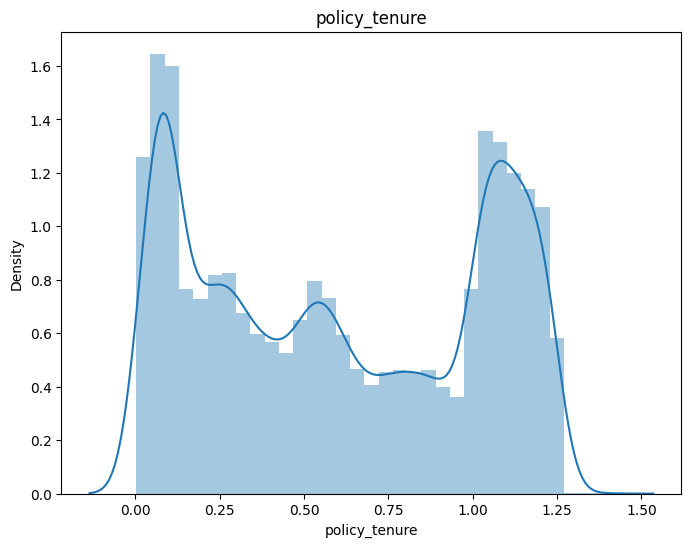

/tmp/ipykernel_9046/3548715098.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(data[i])


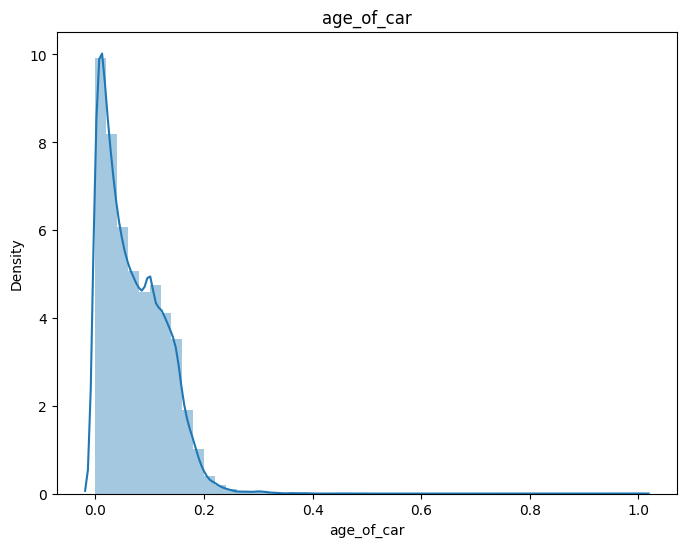

/tmp/ipykernel_9046/3548715098.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(data[i])


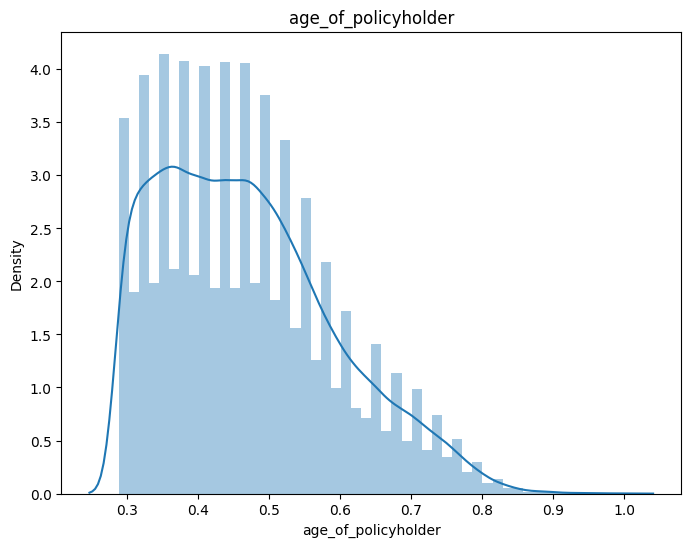

/tmp/ipykernel_9046/3548715098.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(data[i])


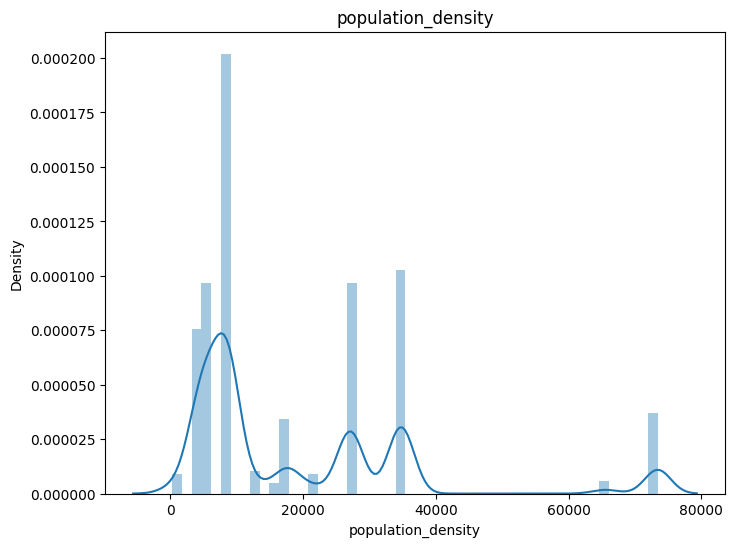

In [72]:
import matplotlib.pyplot as plt
import seaborn as sb

plt.figure(figsize=(8, 6))  # Set the individual figure size

plt.suptitle("Distribution of Numerical Values")

for i in data.loc[:, num_list]:
    plt.figure(figsize=(8, 6))  # Set the individual figure size for each plot
    sb.distplot(data[i])
    plt.title(i)
    plt.show()

As we can see, there seem to be some outliers in the age_of_car. Let's further analyze this column.

In [73]:
from collections import Counter

print(f"99.5 percentile for age_of_car {data.age_of_car.quantile(0.995)}")
extreme_age_of_car_indices = data.age_of_car > data.age_of_car.quantile(0.995)
extreme_is_claim_counts = Counter(data.loc[extreme_age_of_car_indices].is_claim)
print("Number of extreme values to be removed: ", sum(extreme_age_of_car_indices))

99.5 percentile for age_of_car 0.24
Number of extreme values to be removed:  269


99.5% of cars have a normalized age under 0.24. We decided to remove every entry whose age_of_car column has over this value, and renormalize the data.

/tmp/ipykernel_9046/840333840.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(data['age_of_car'])


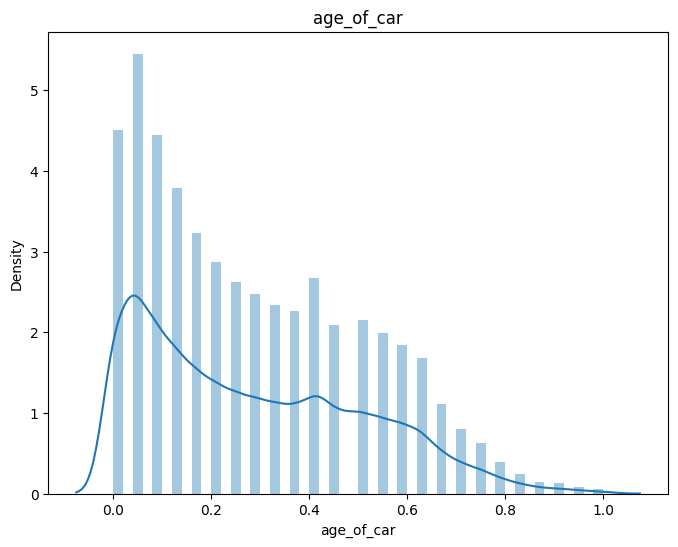

In [74]:
data = data.loc[~extreme_age_of_car_indices]
age_min = data['age_of_car'].min()
age_max = data['age_of_car'].max()

# Perform min-max scaling to normalize the column
data['age_of_car'] = (data['age_of_car'] - age_min) / (age_max - age_min)

plt.figure(figsize=(8, 6))  # Set the individual figure size for each plot
sb.distplot(data['age_of_car'])
plt.title('age_of_car')
plt.show()

Now let's analyze the categorical attributes

/tmp/ipykernel_9046/4186395640.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(13,13))


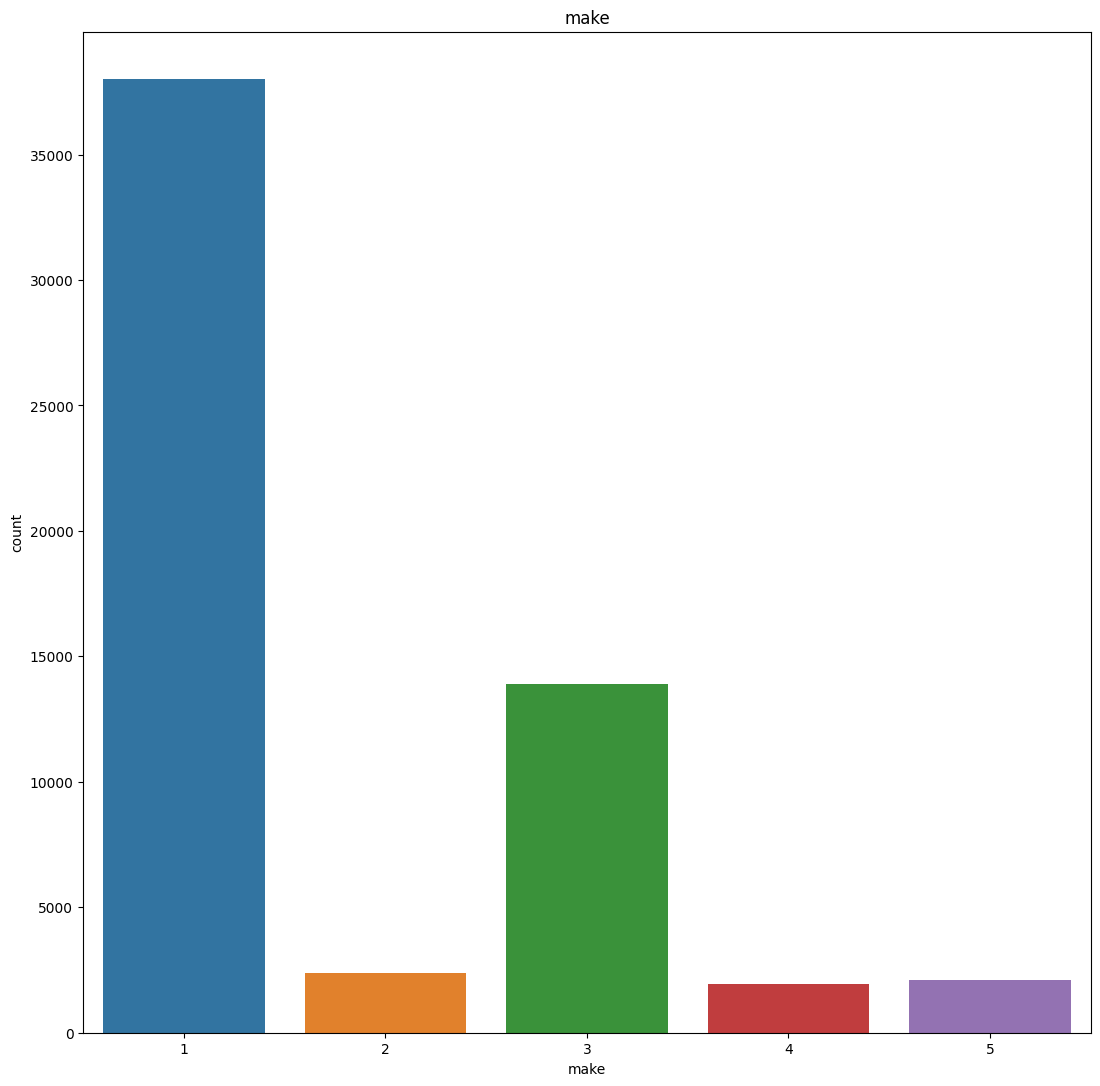

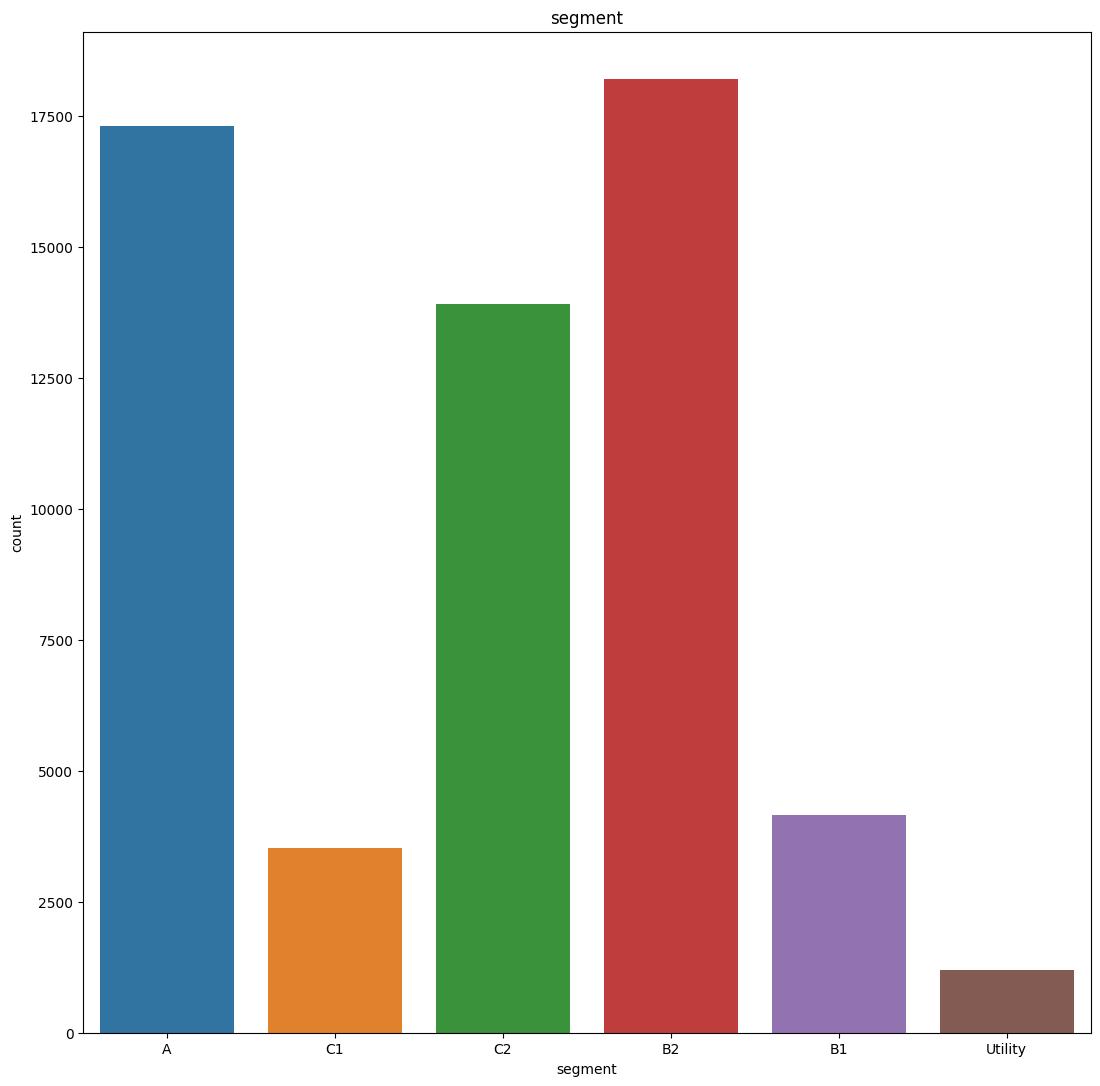

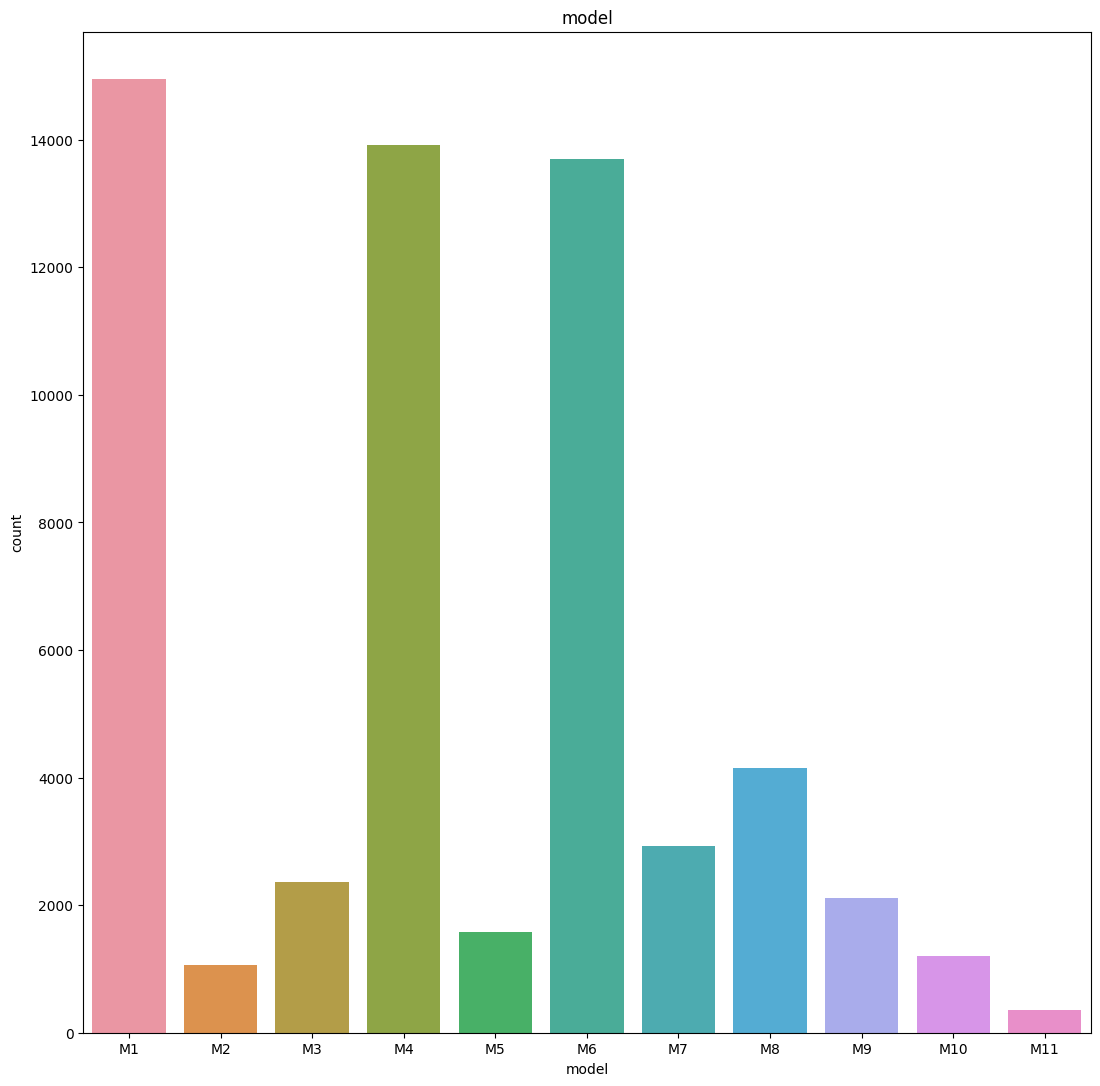

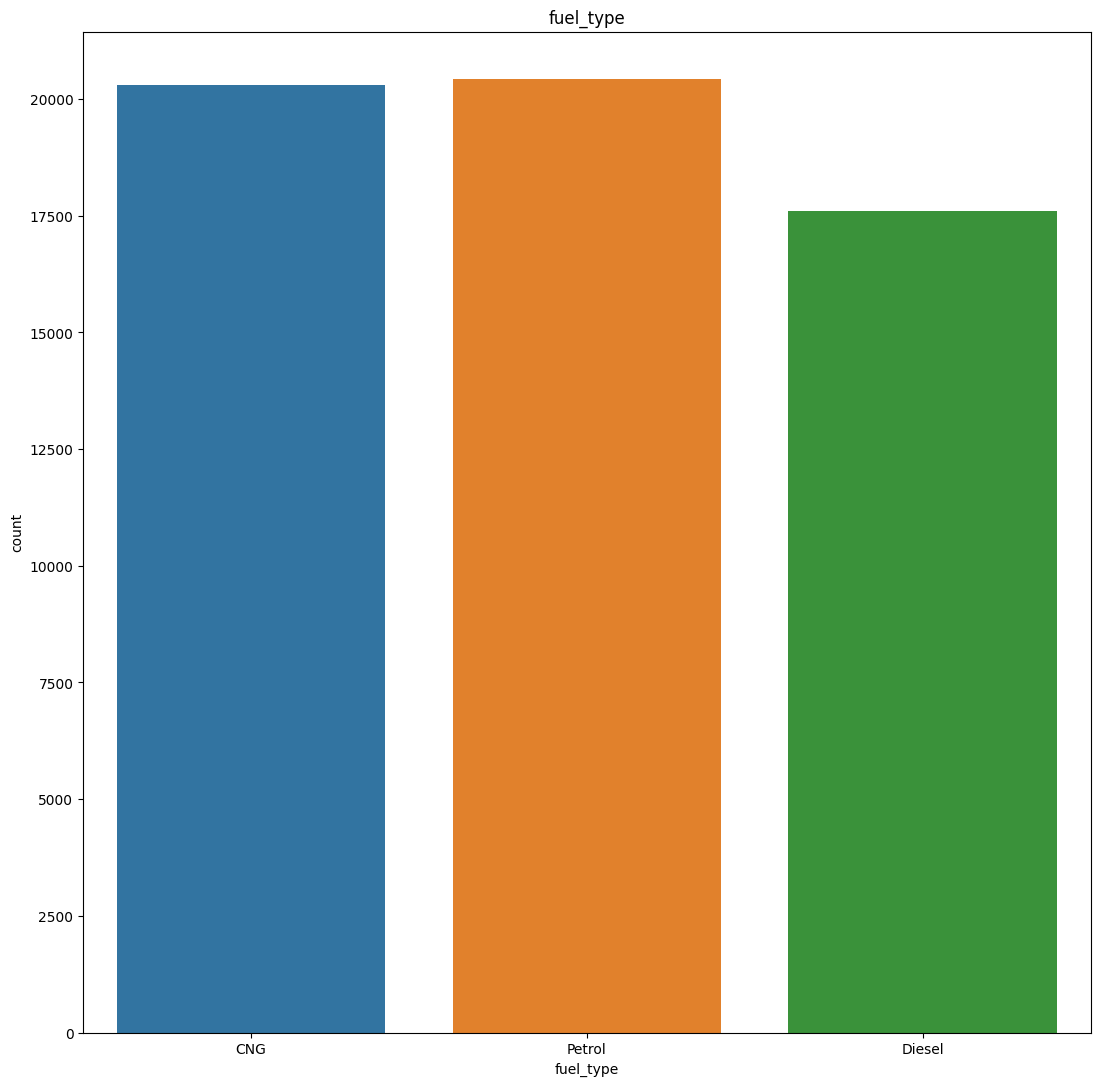

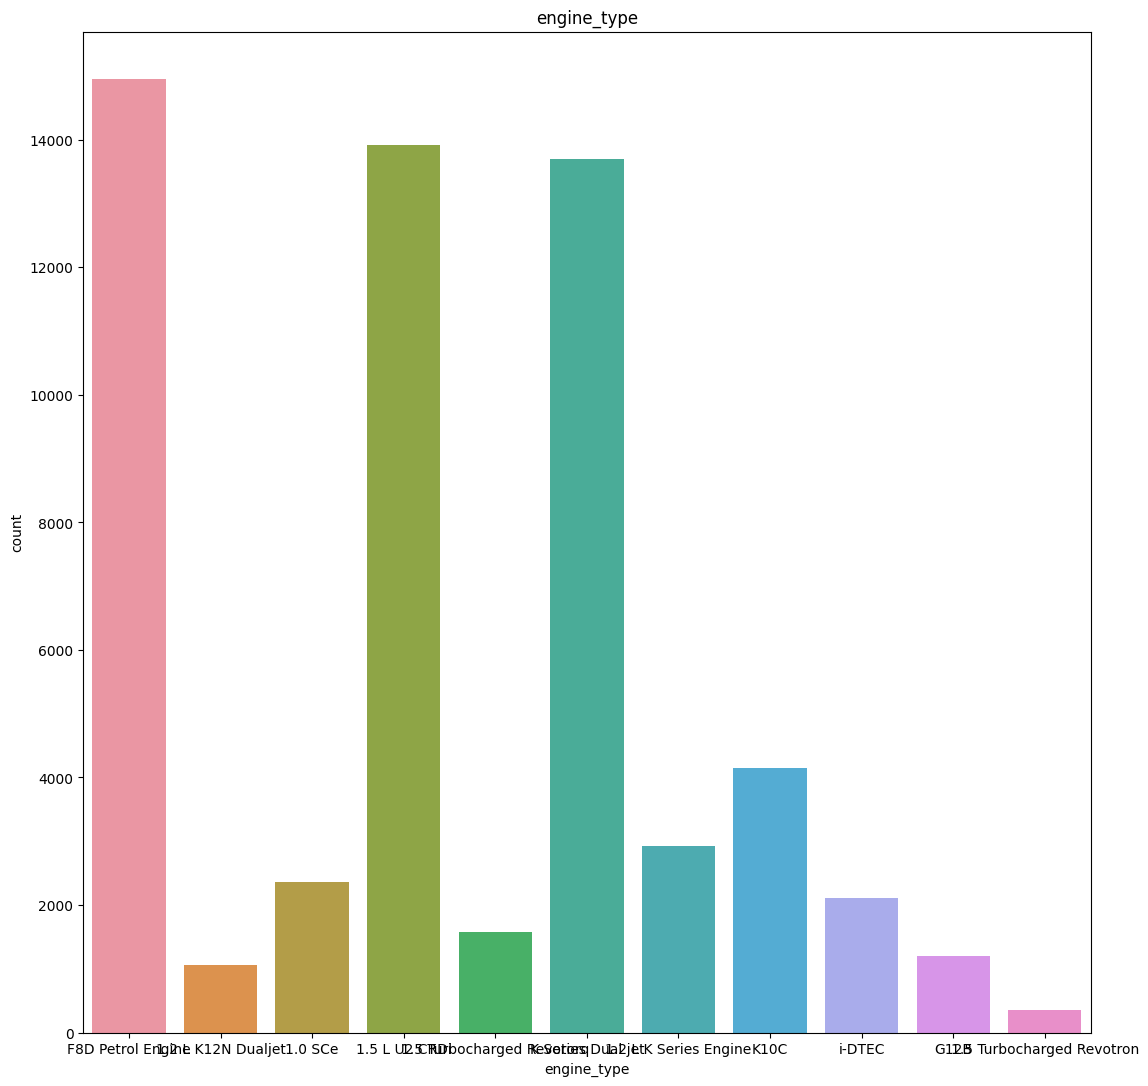

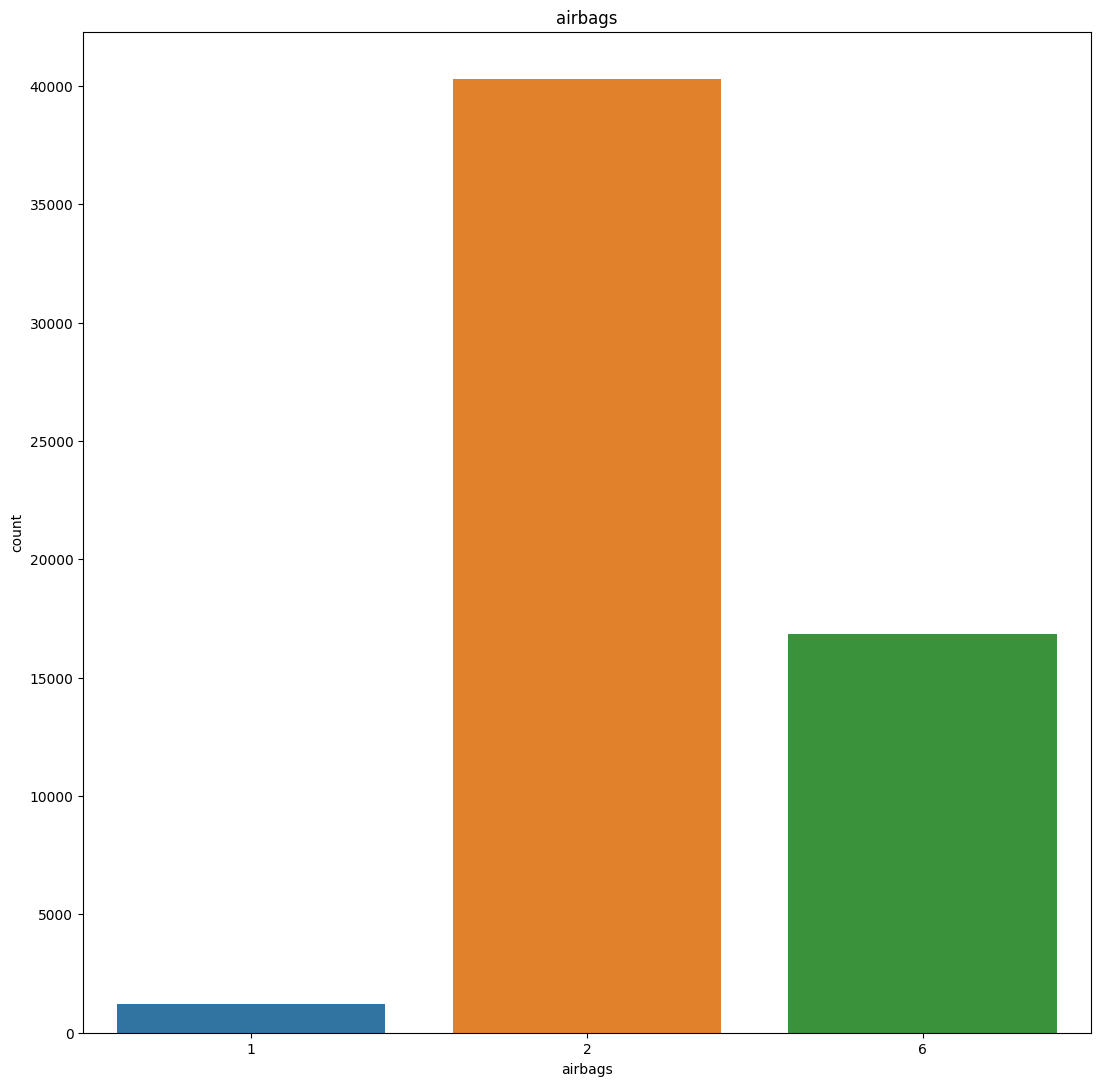

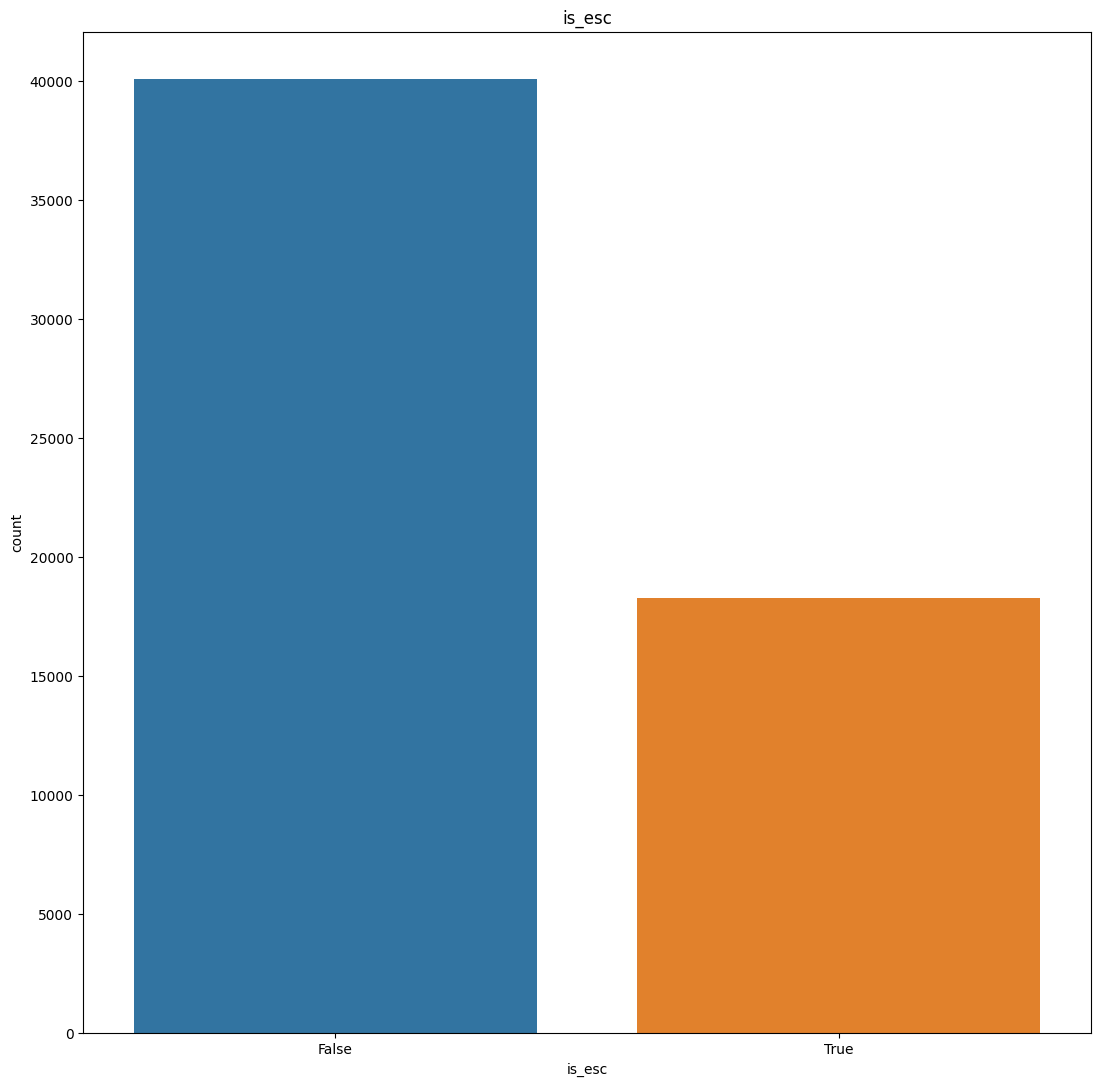

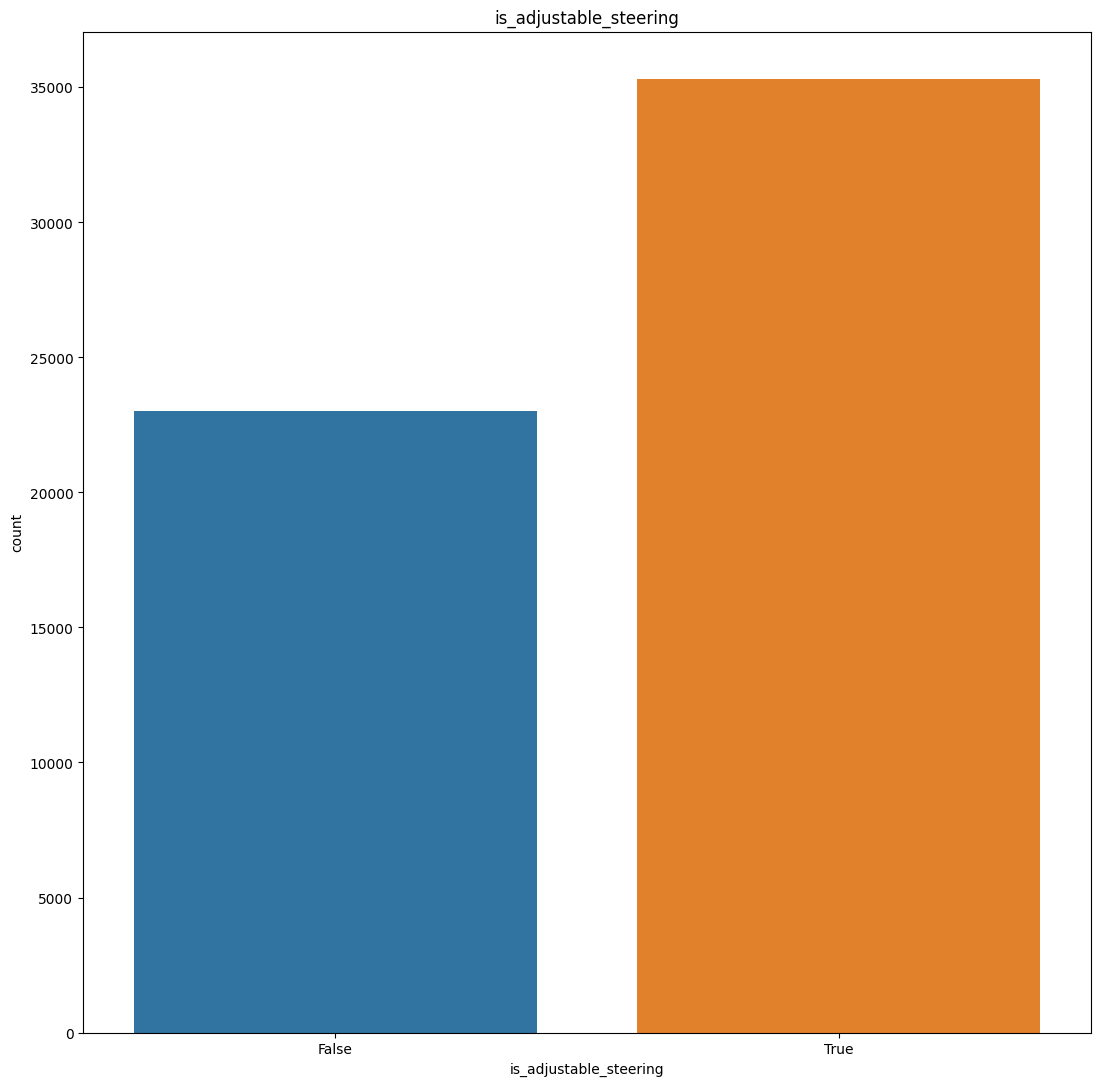

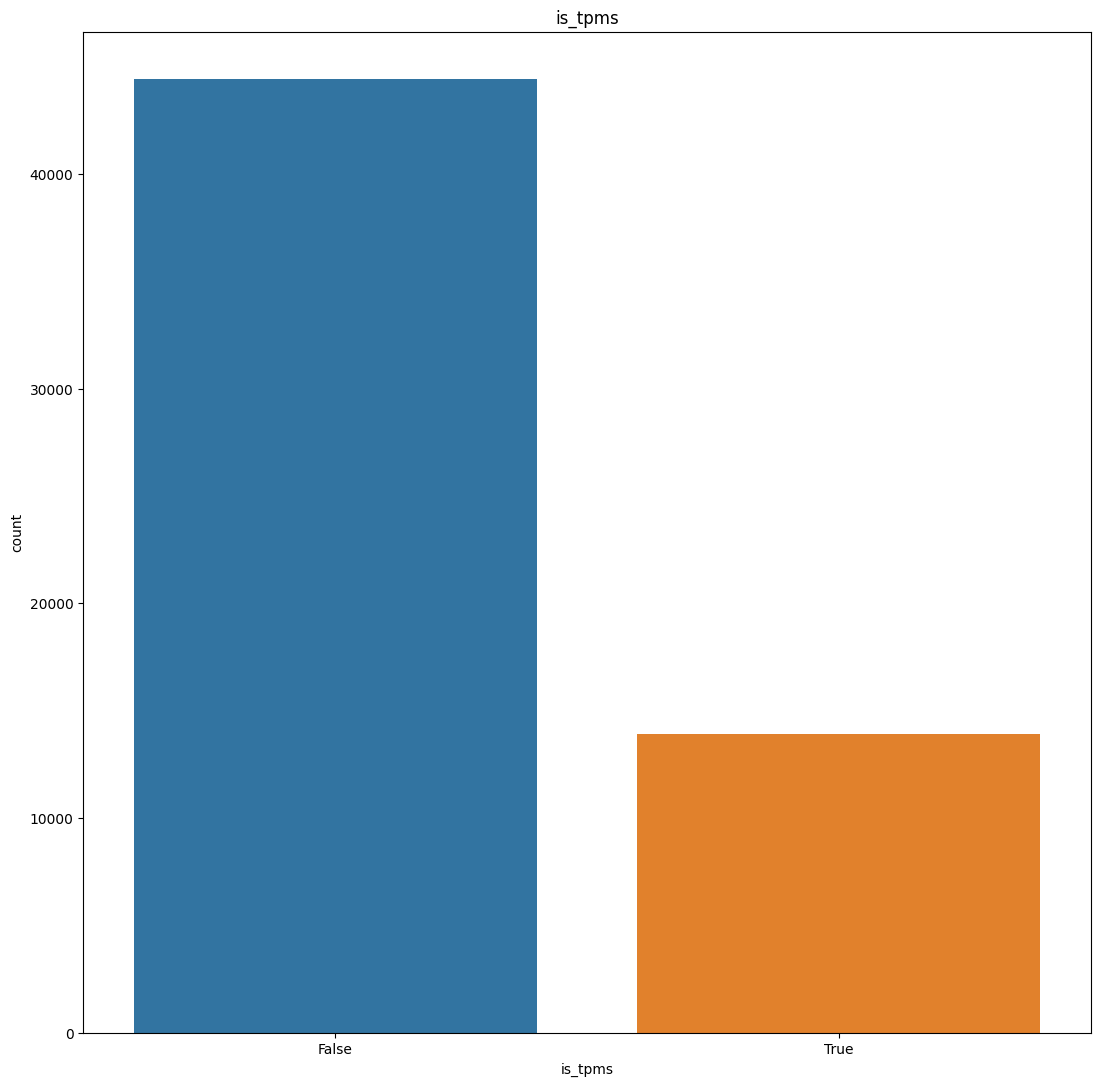

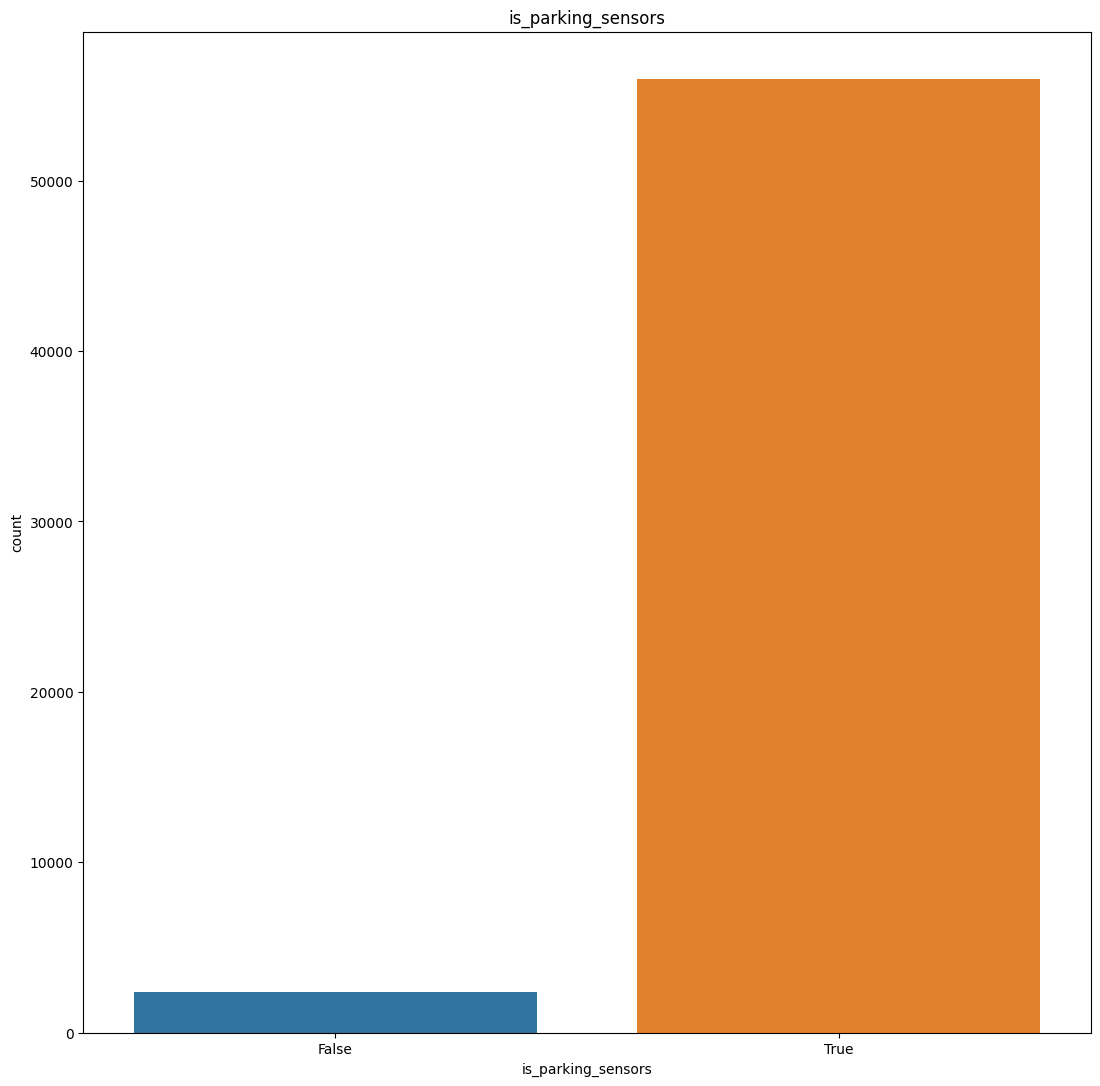

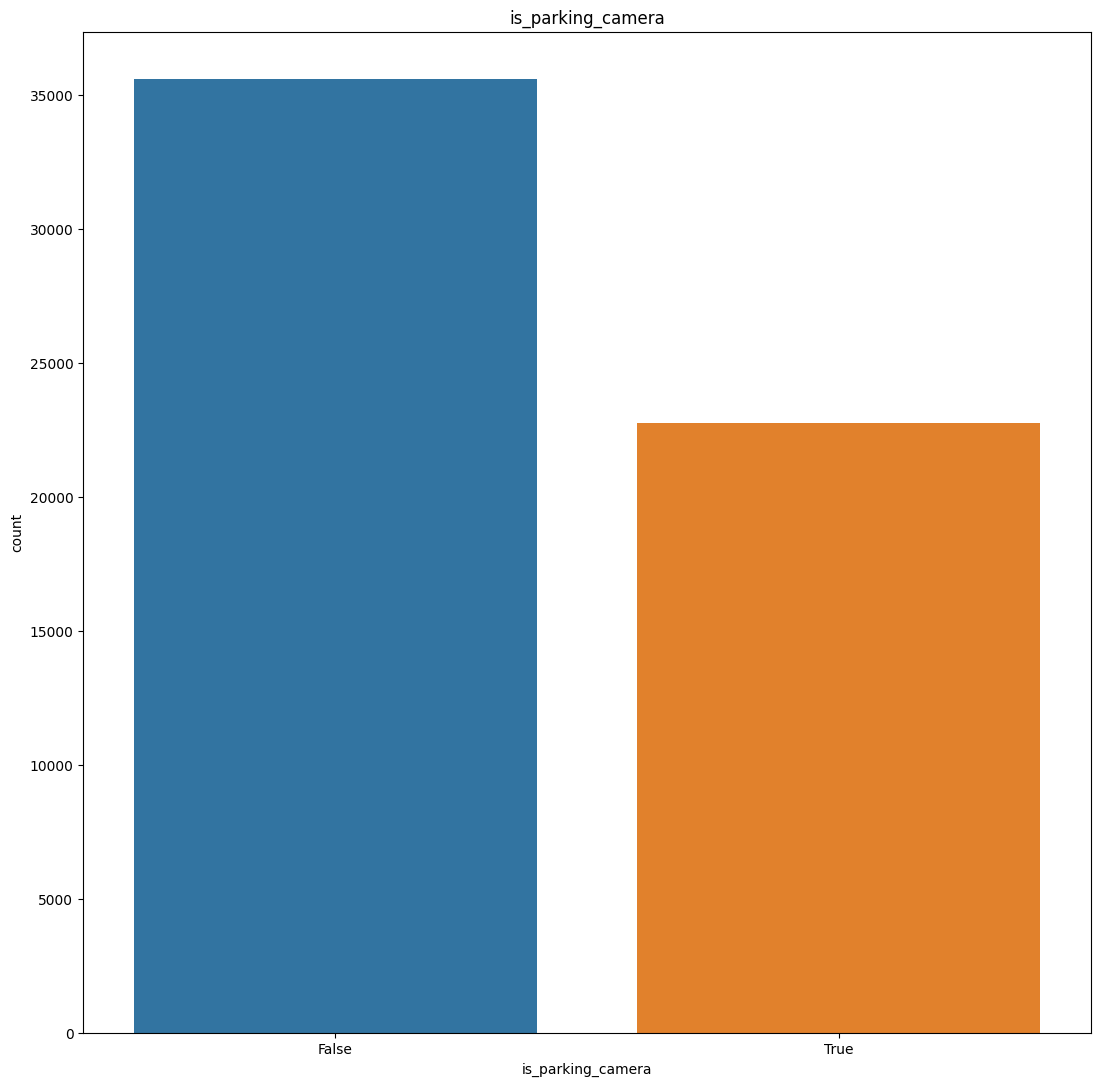

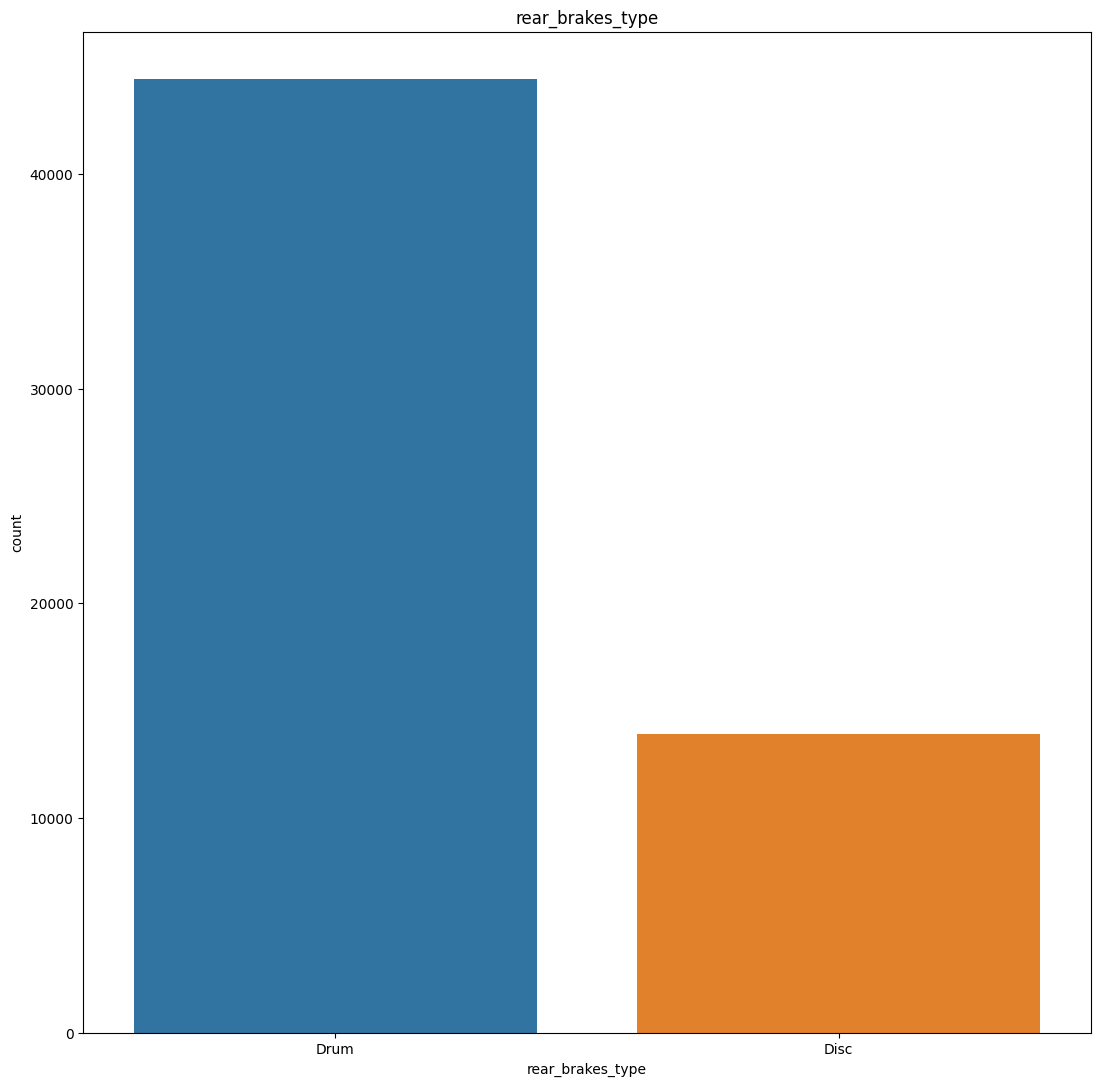

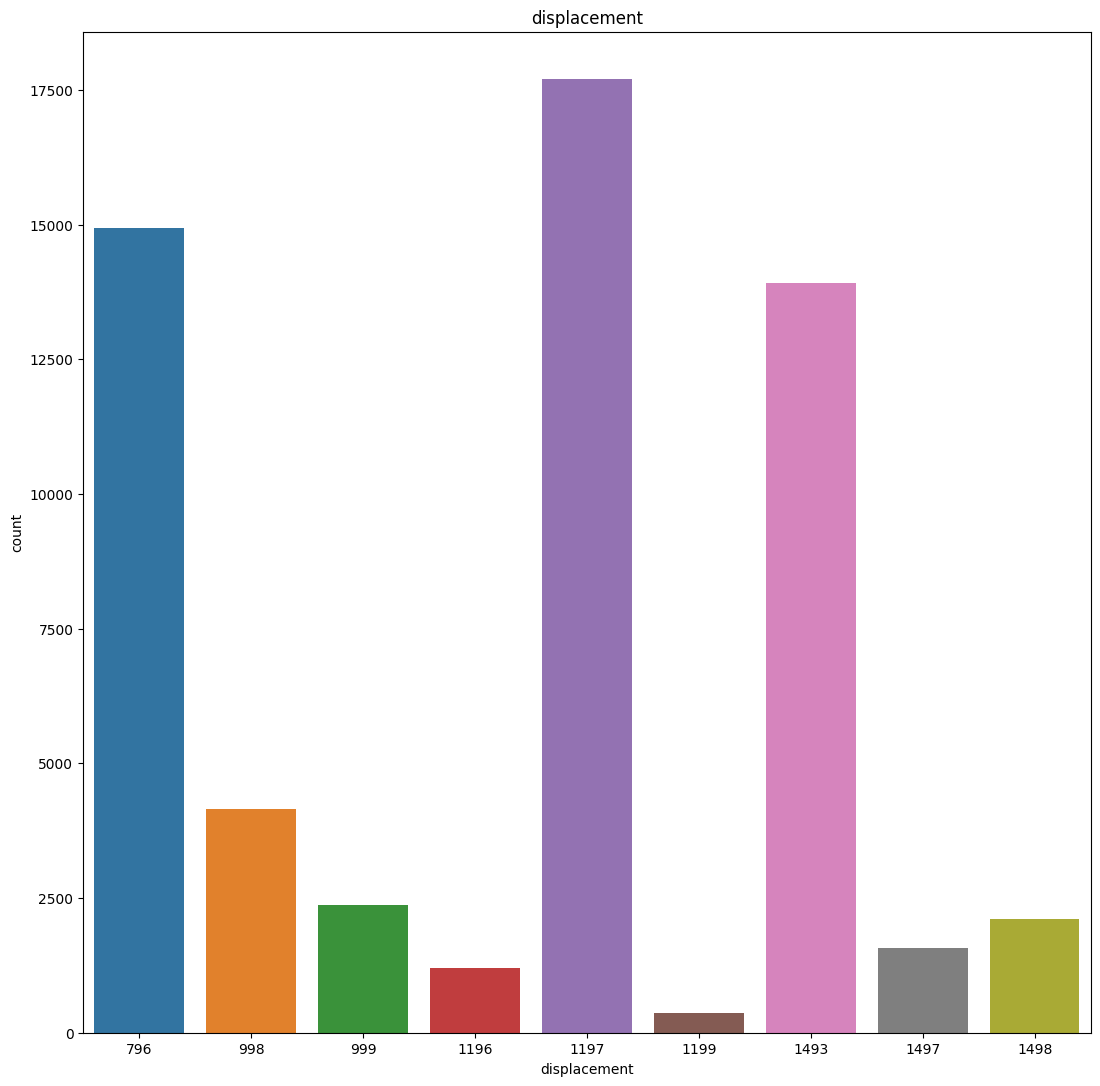

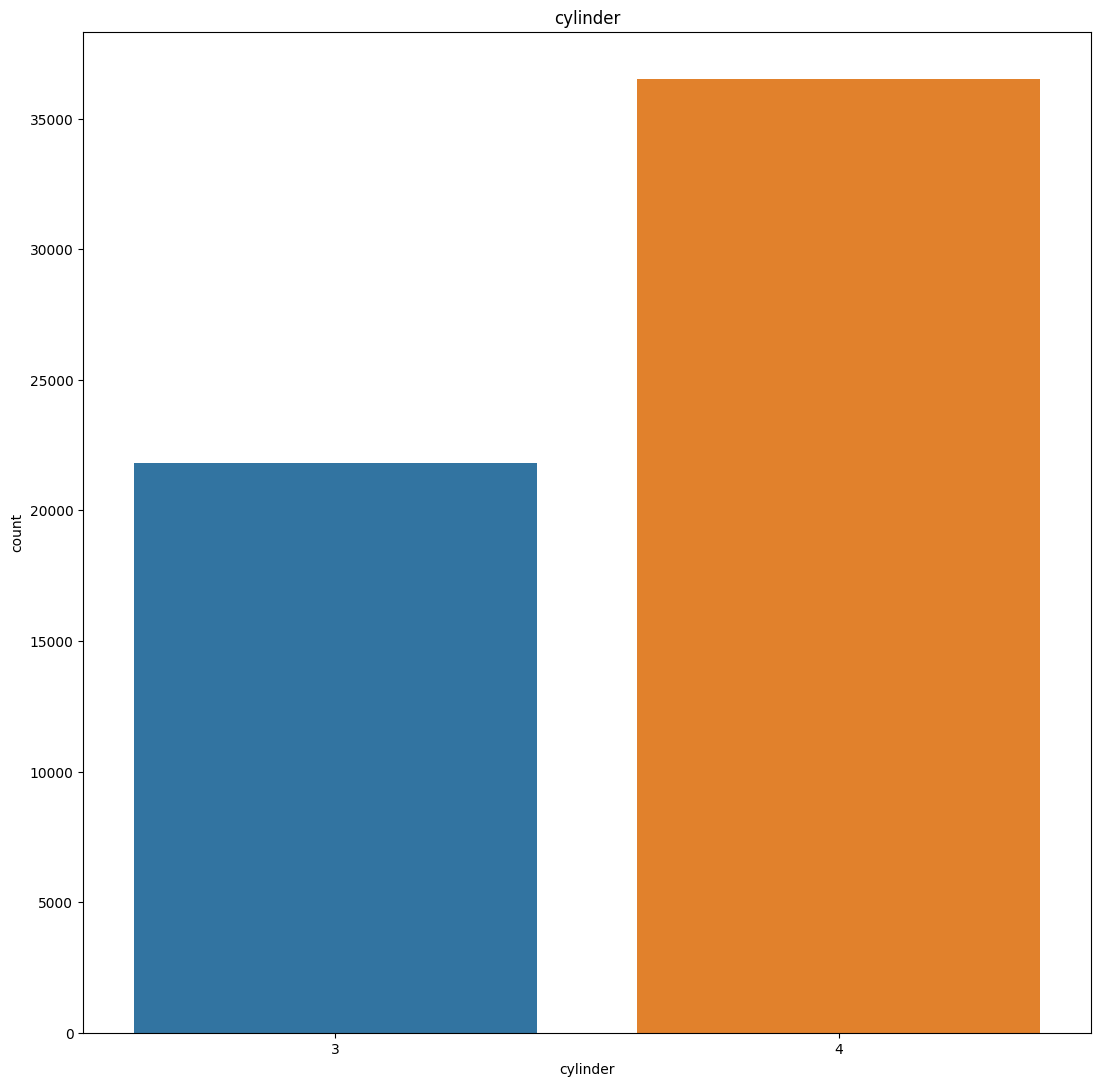

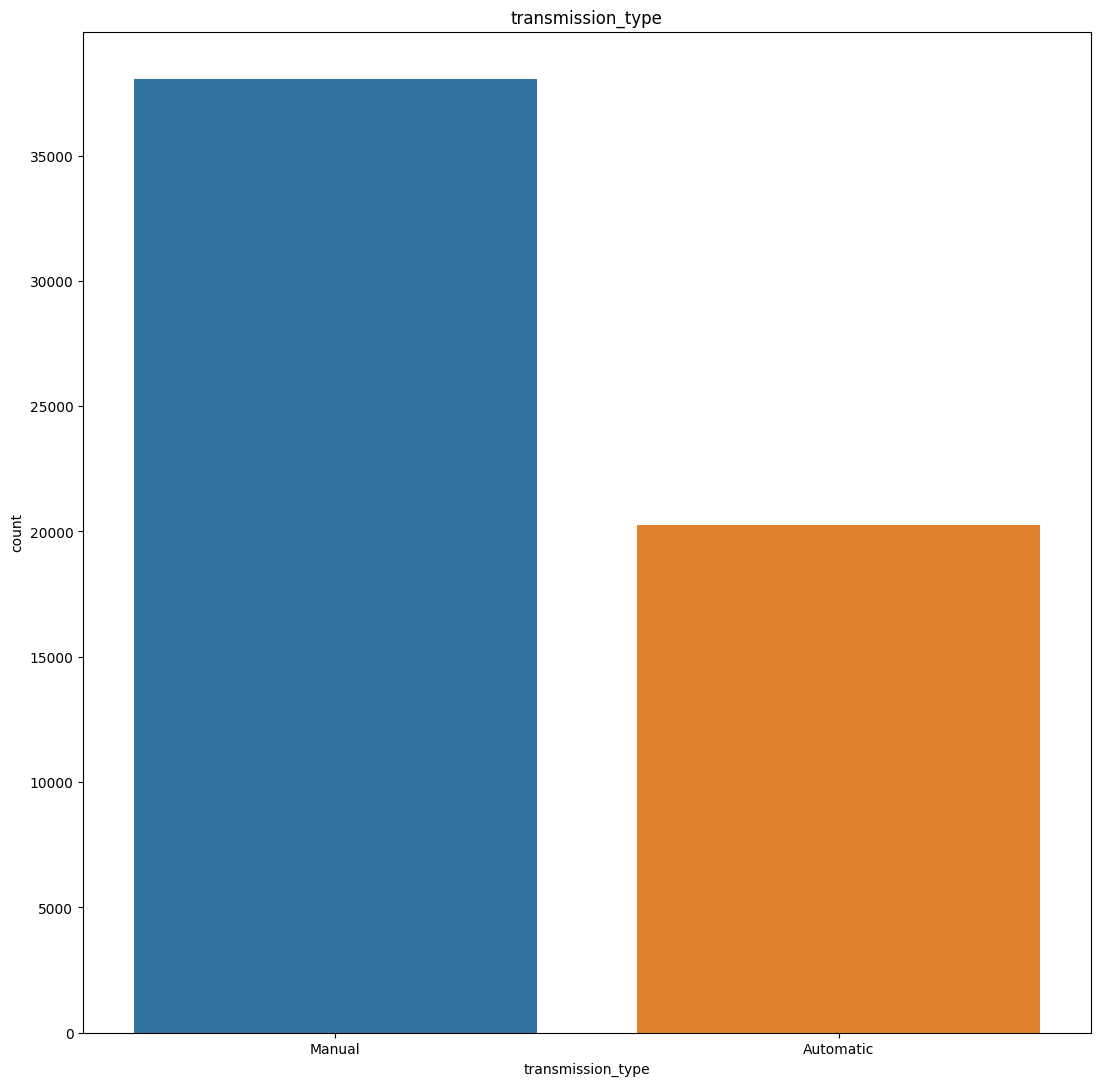

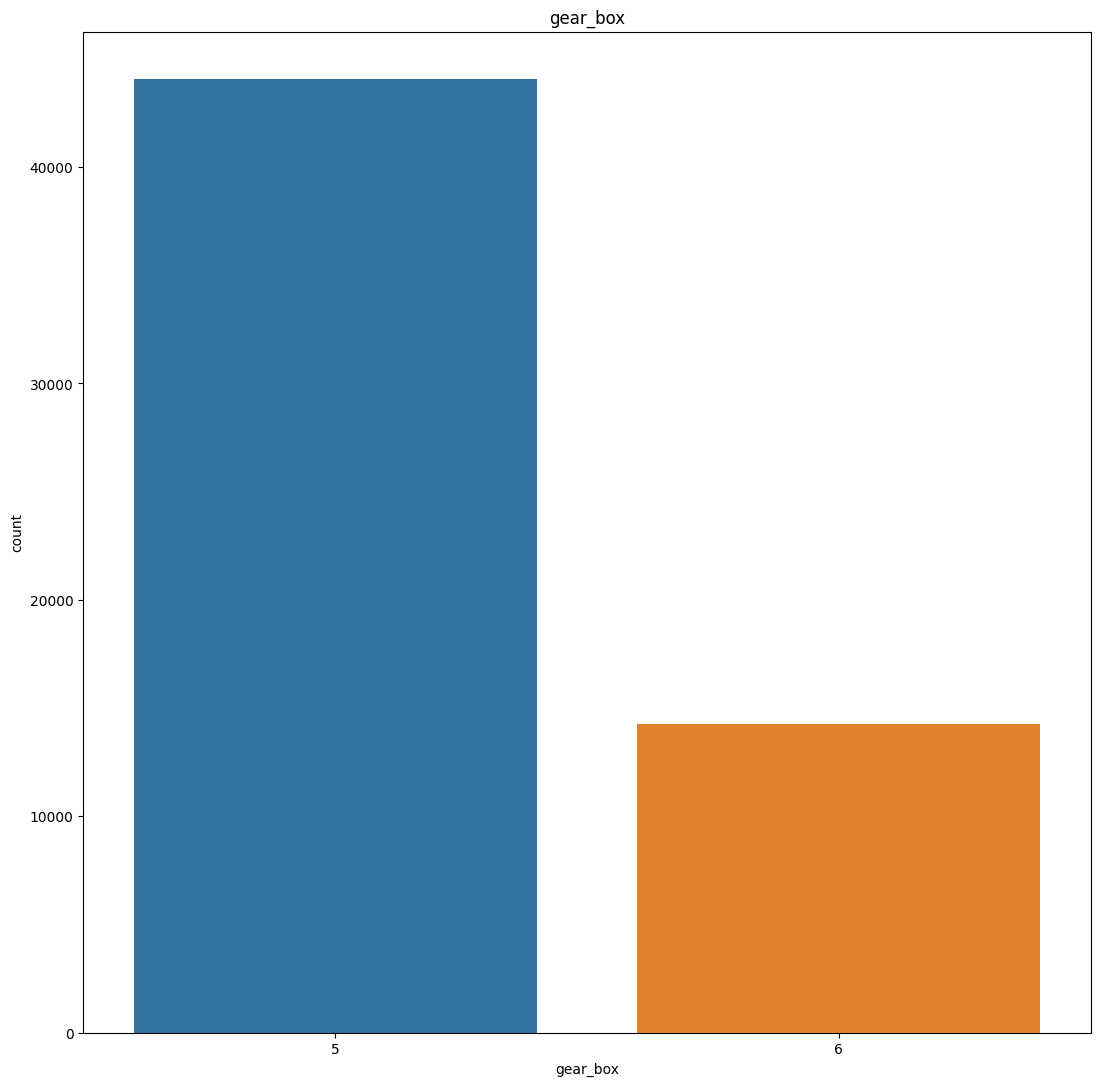

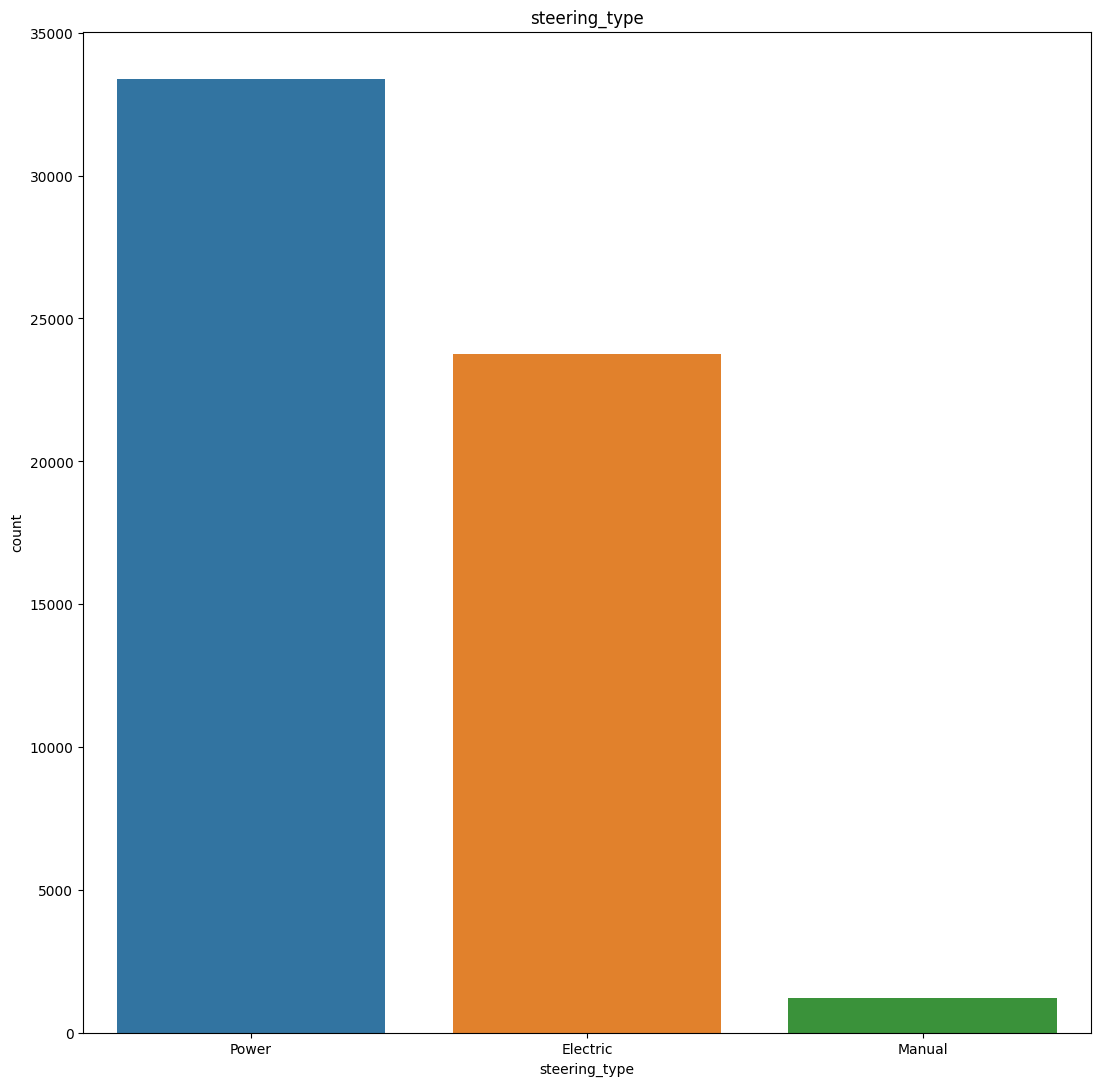

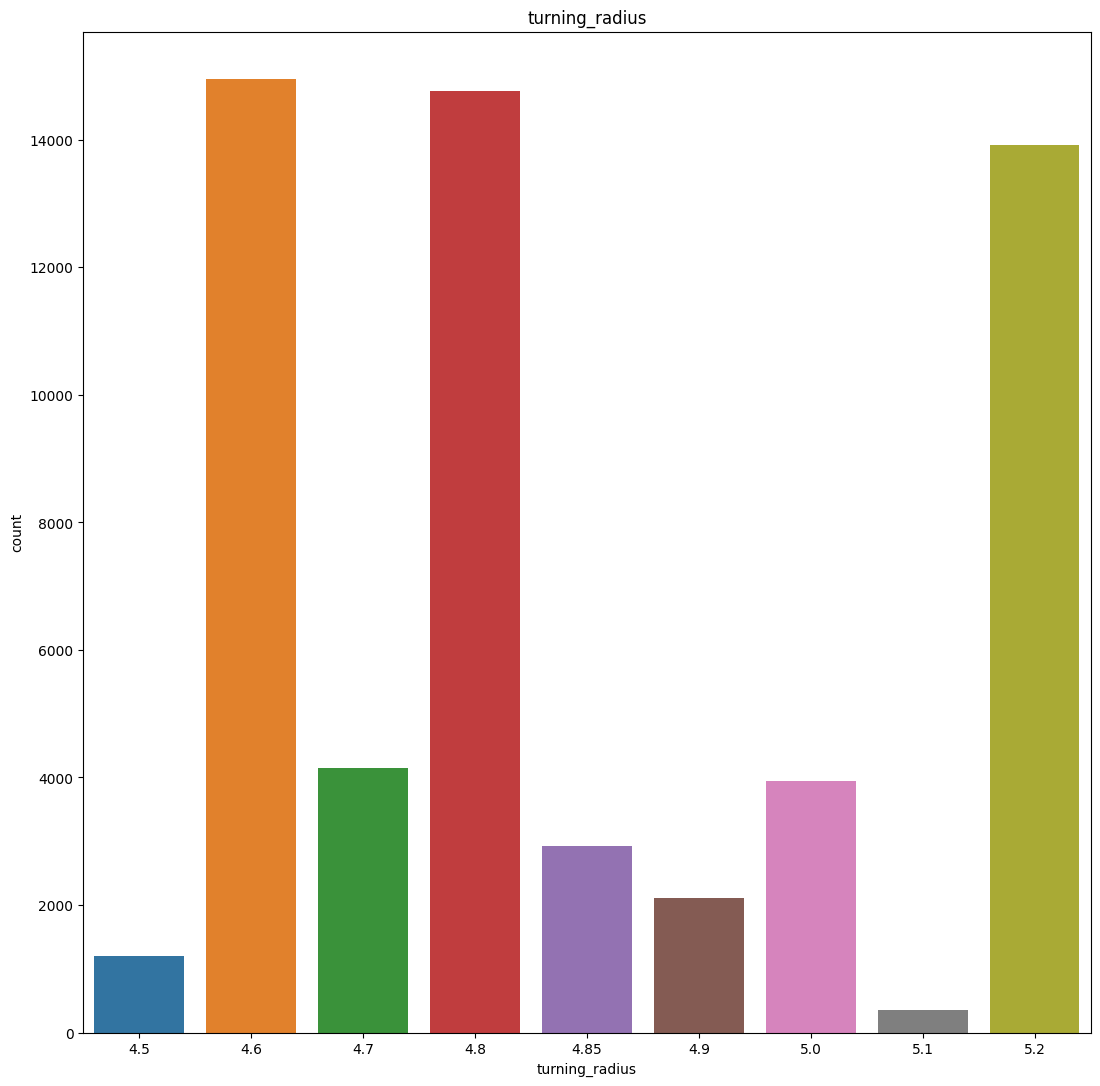

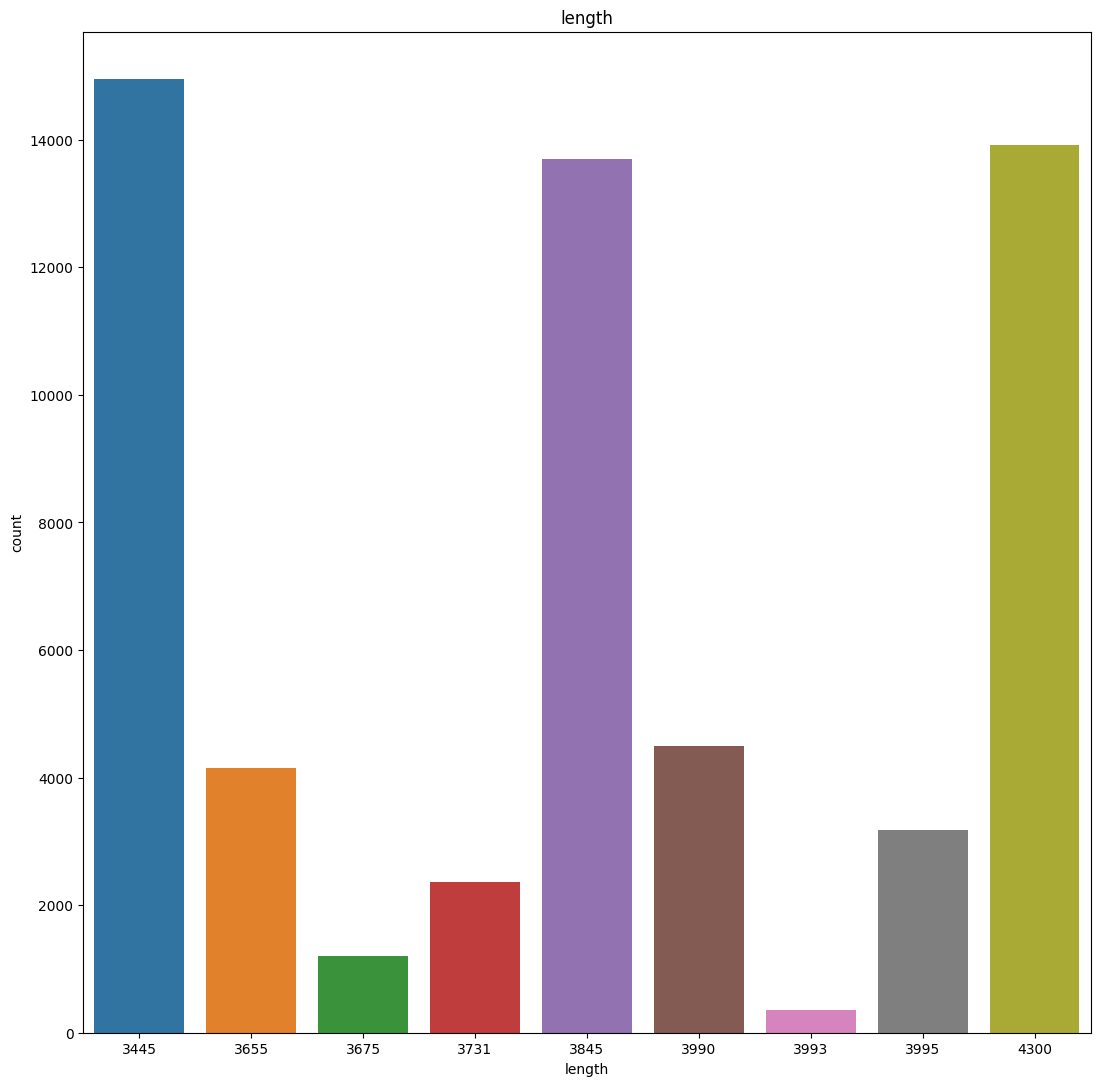

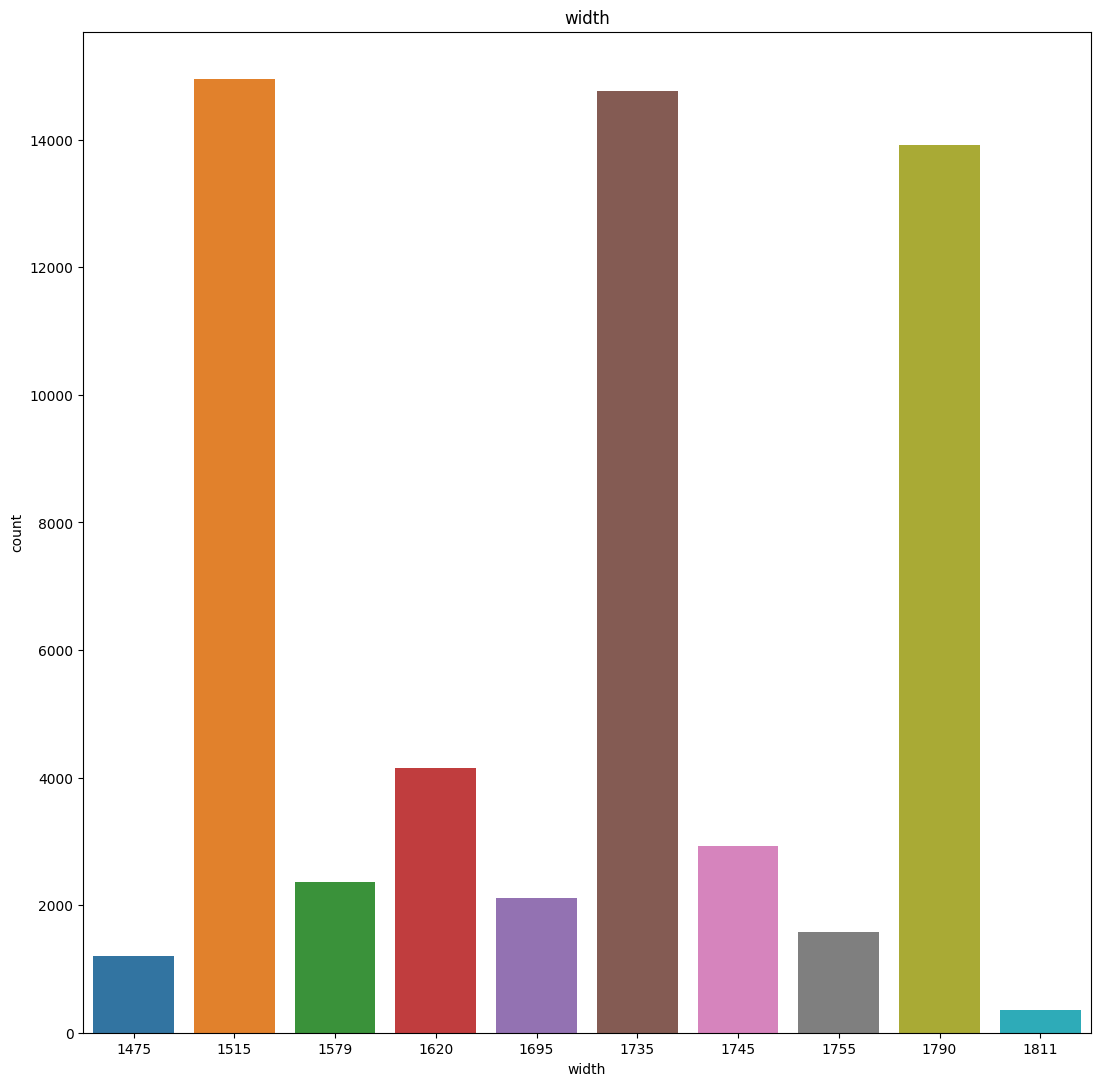

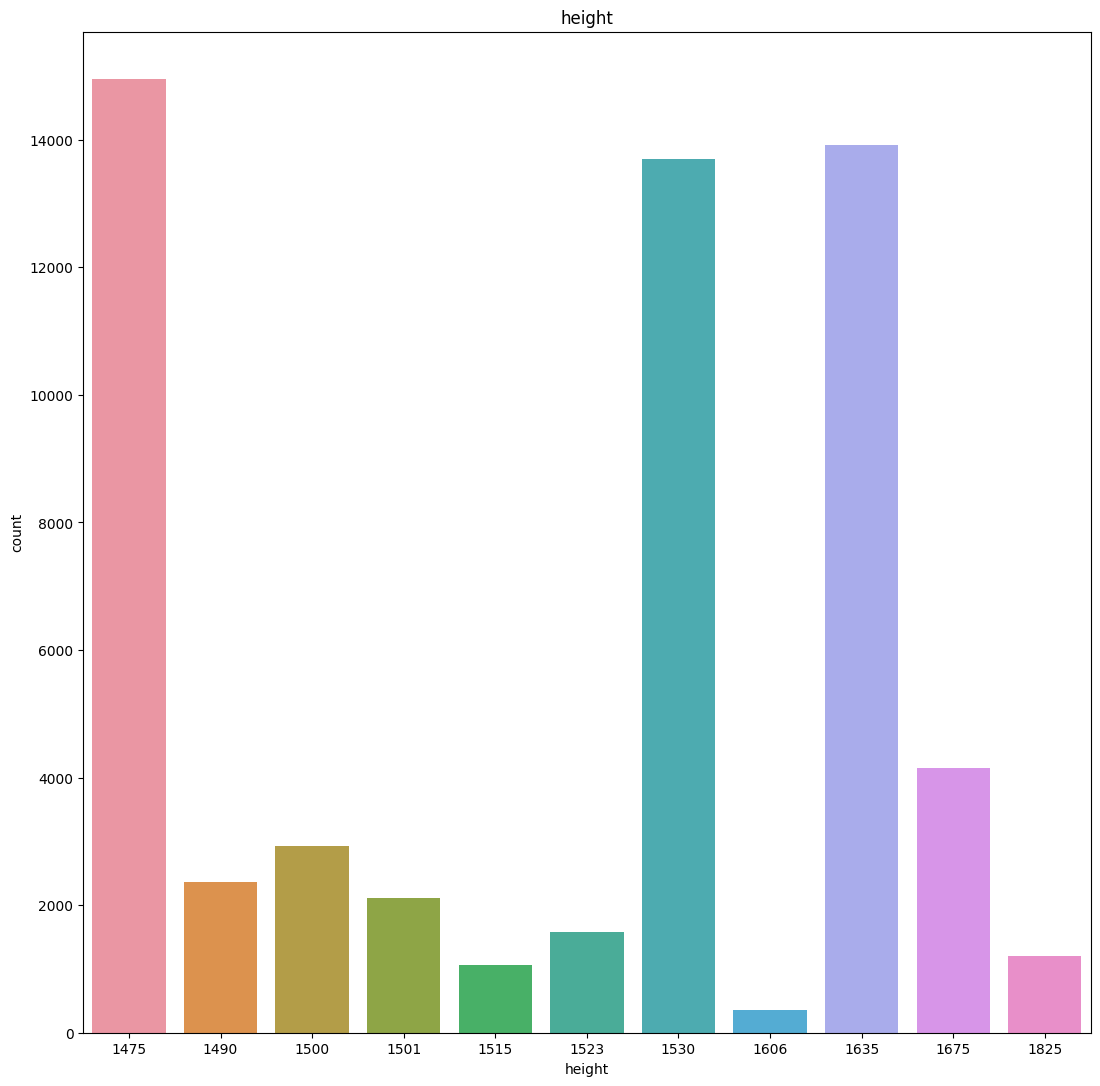

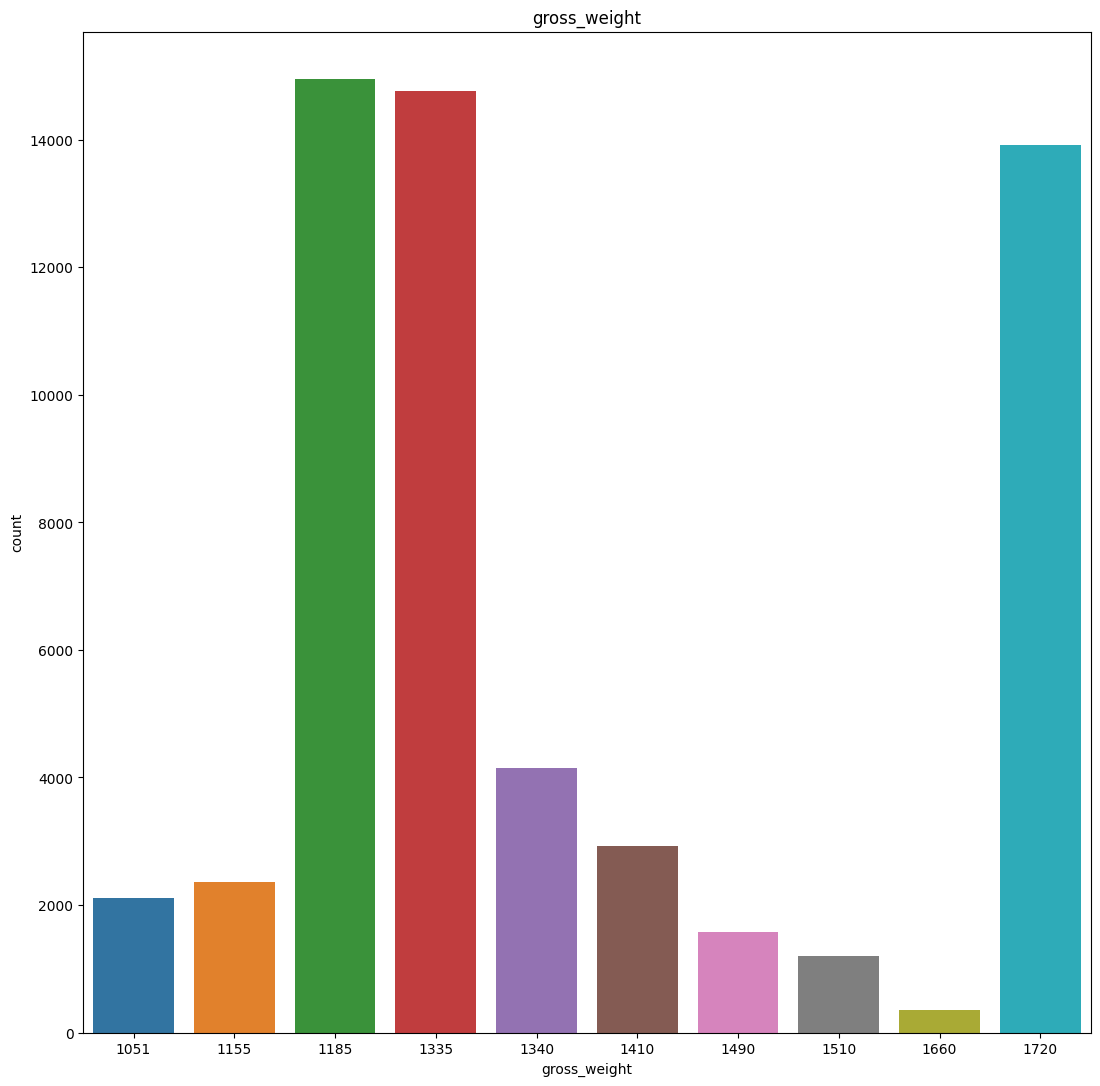

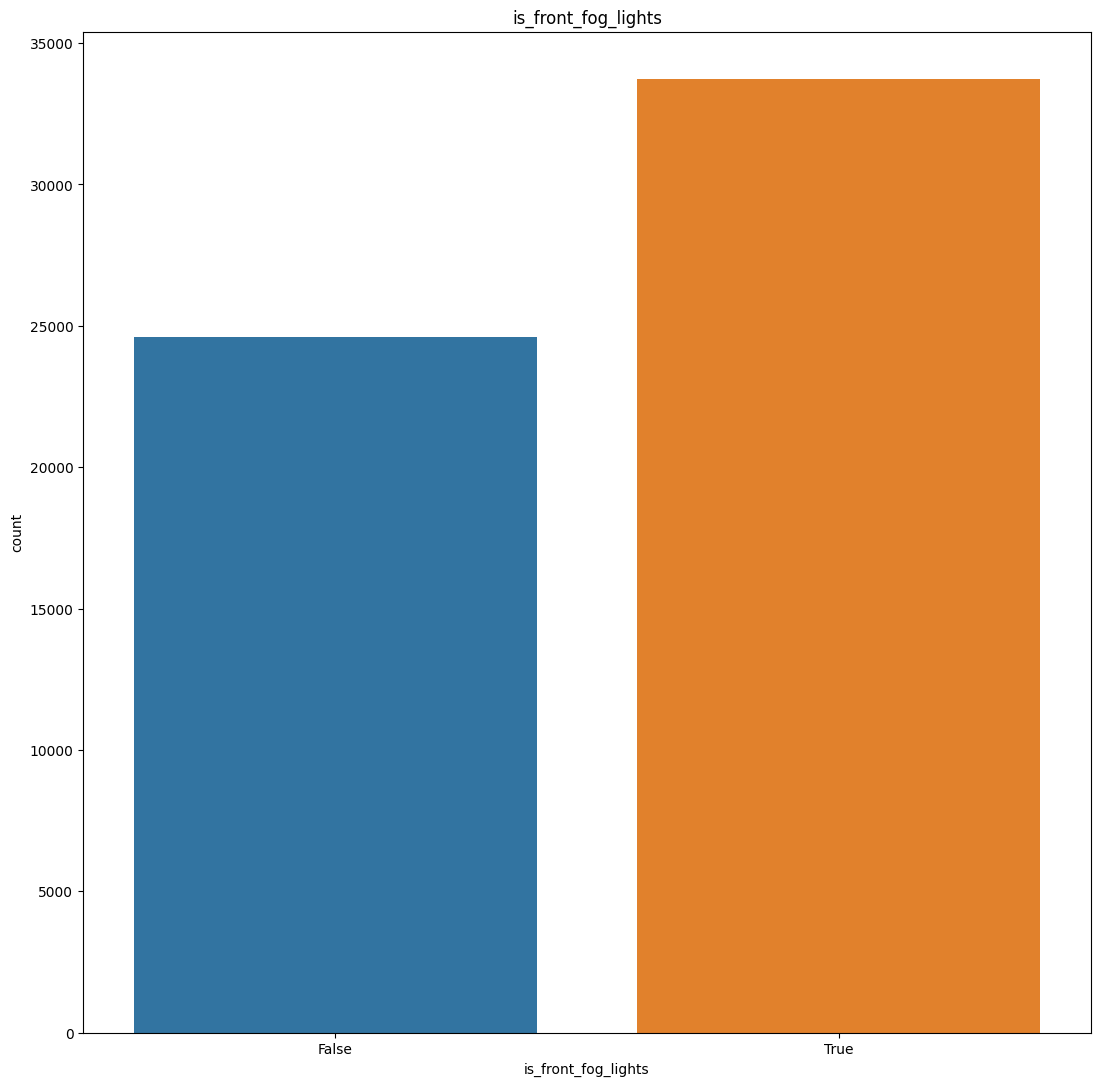

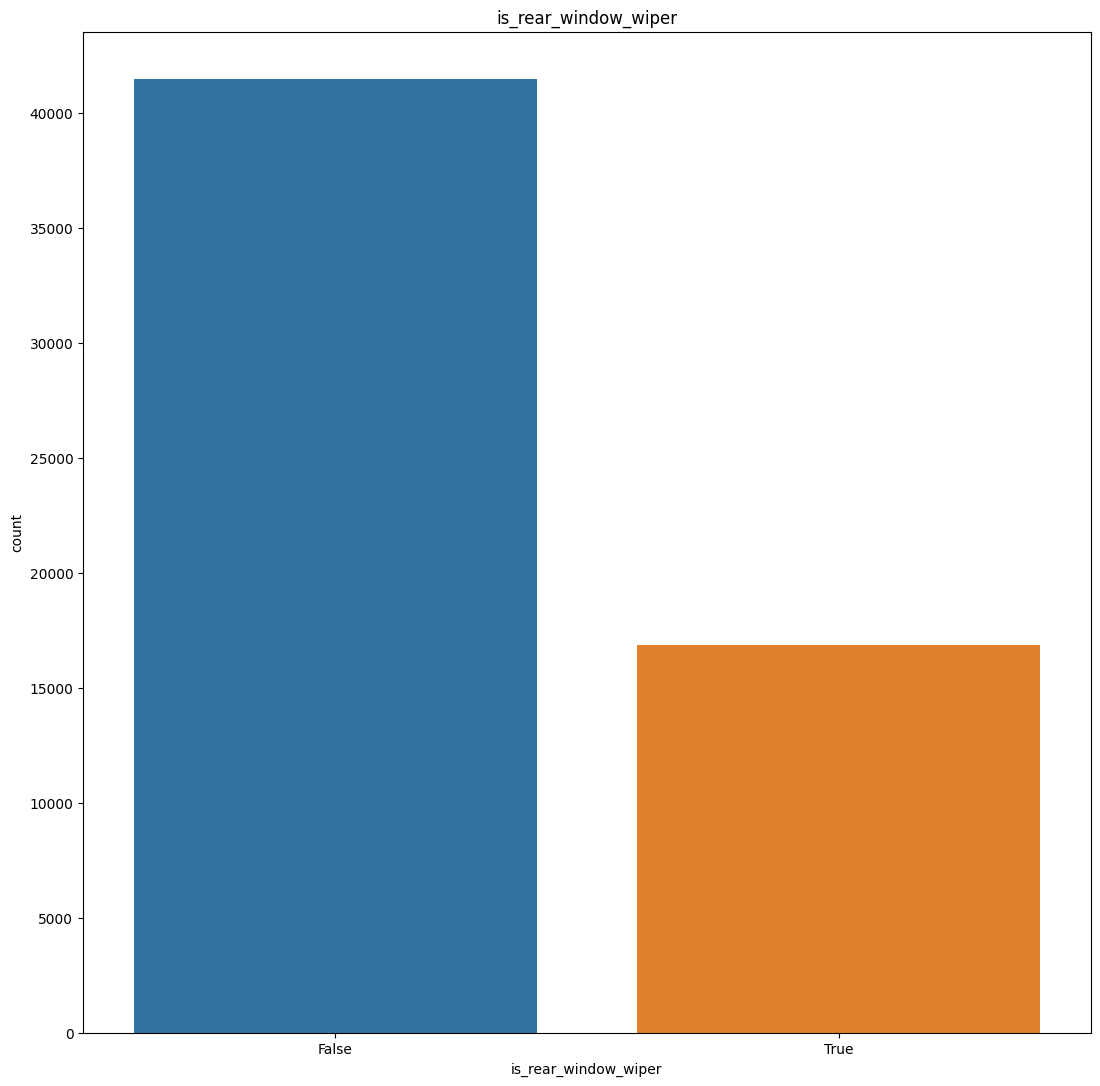

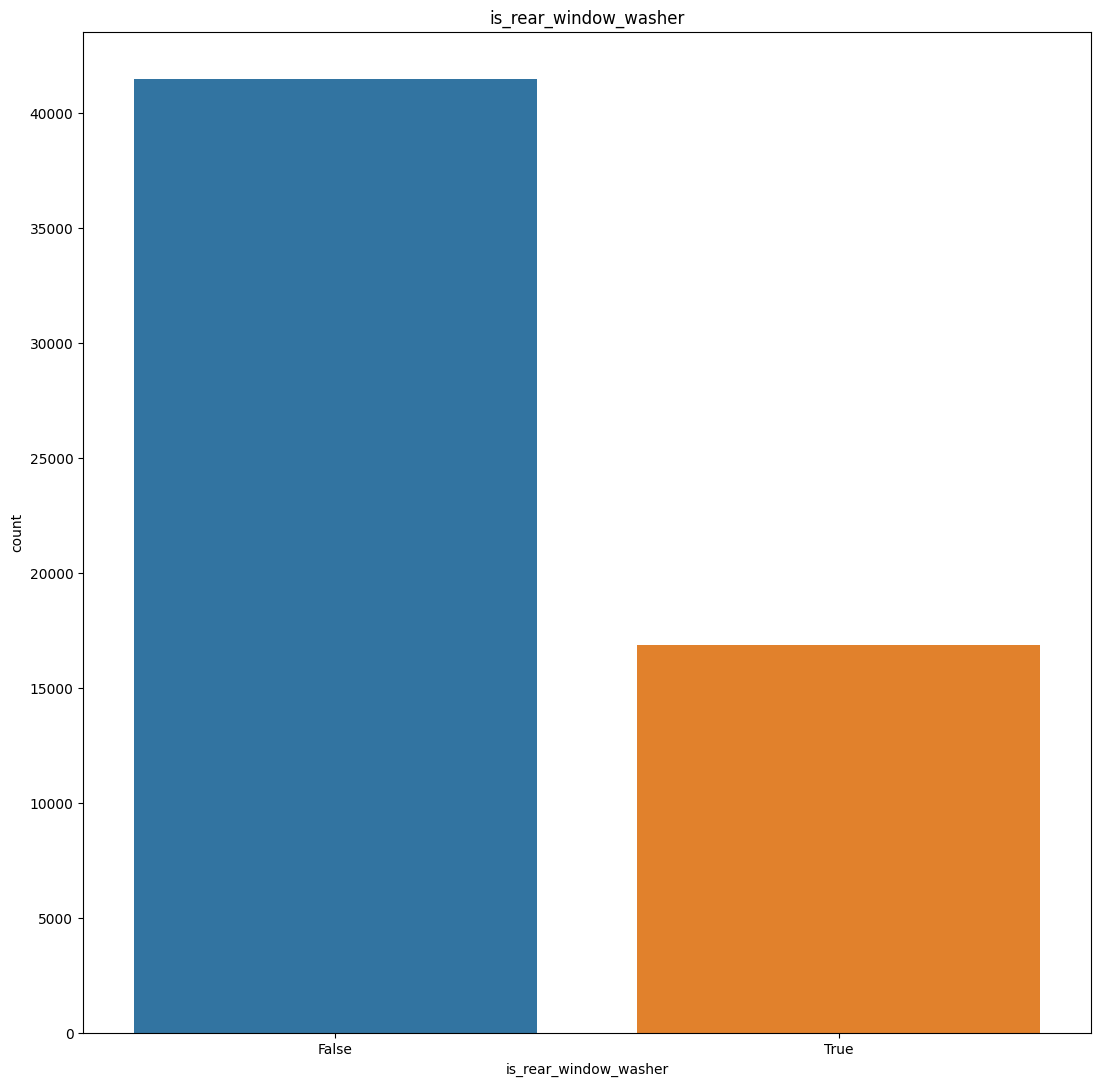

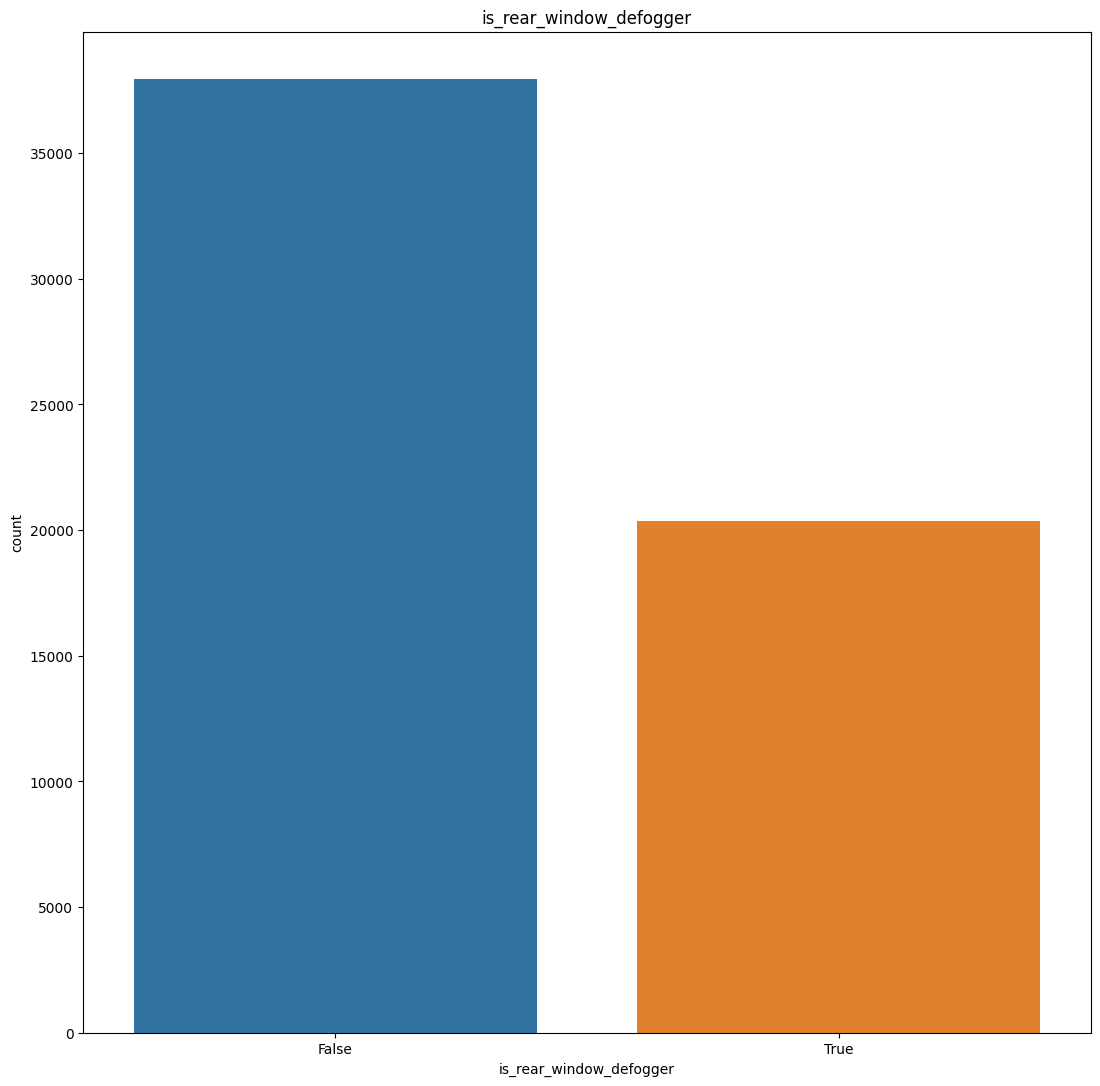

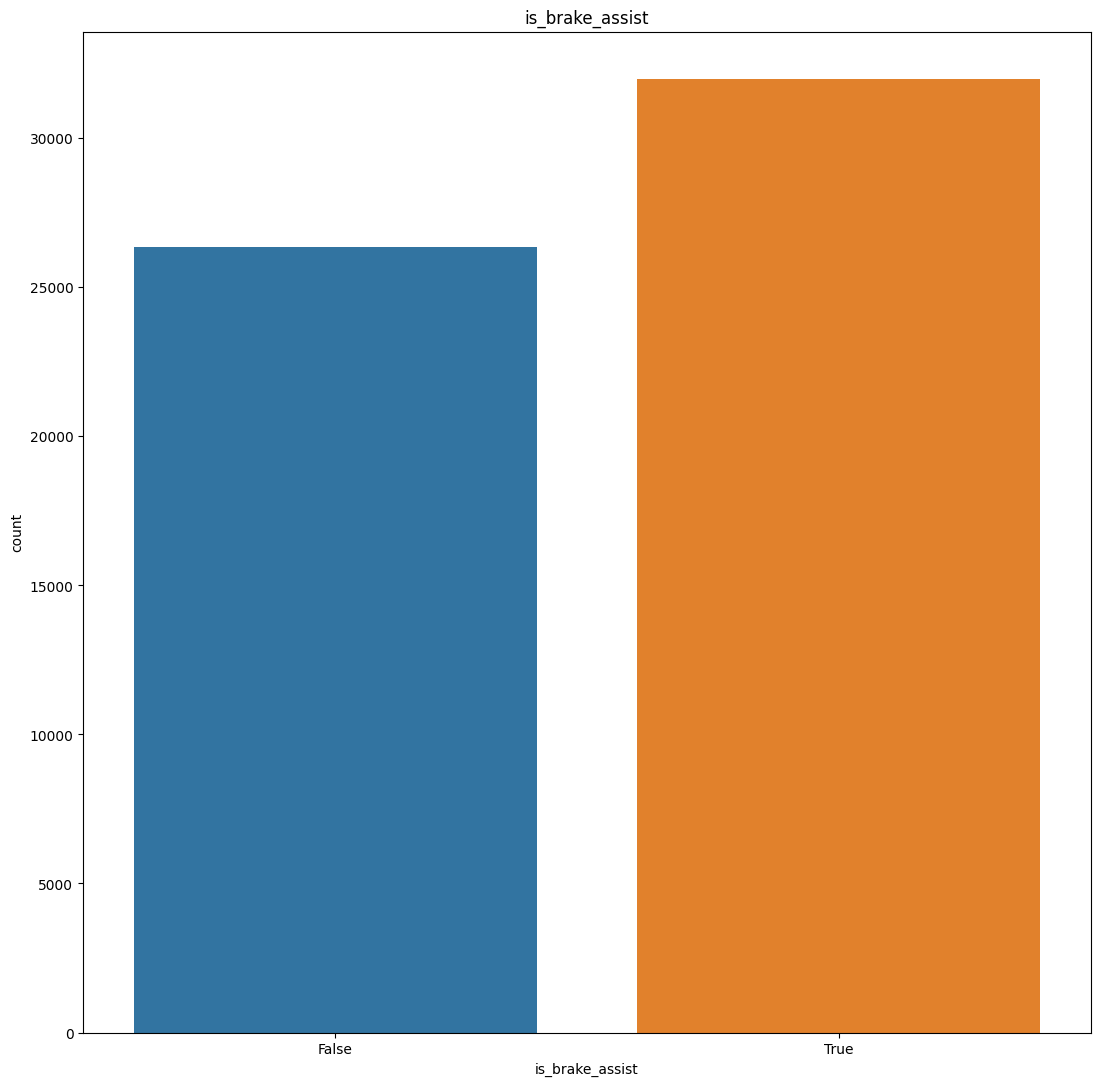

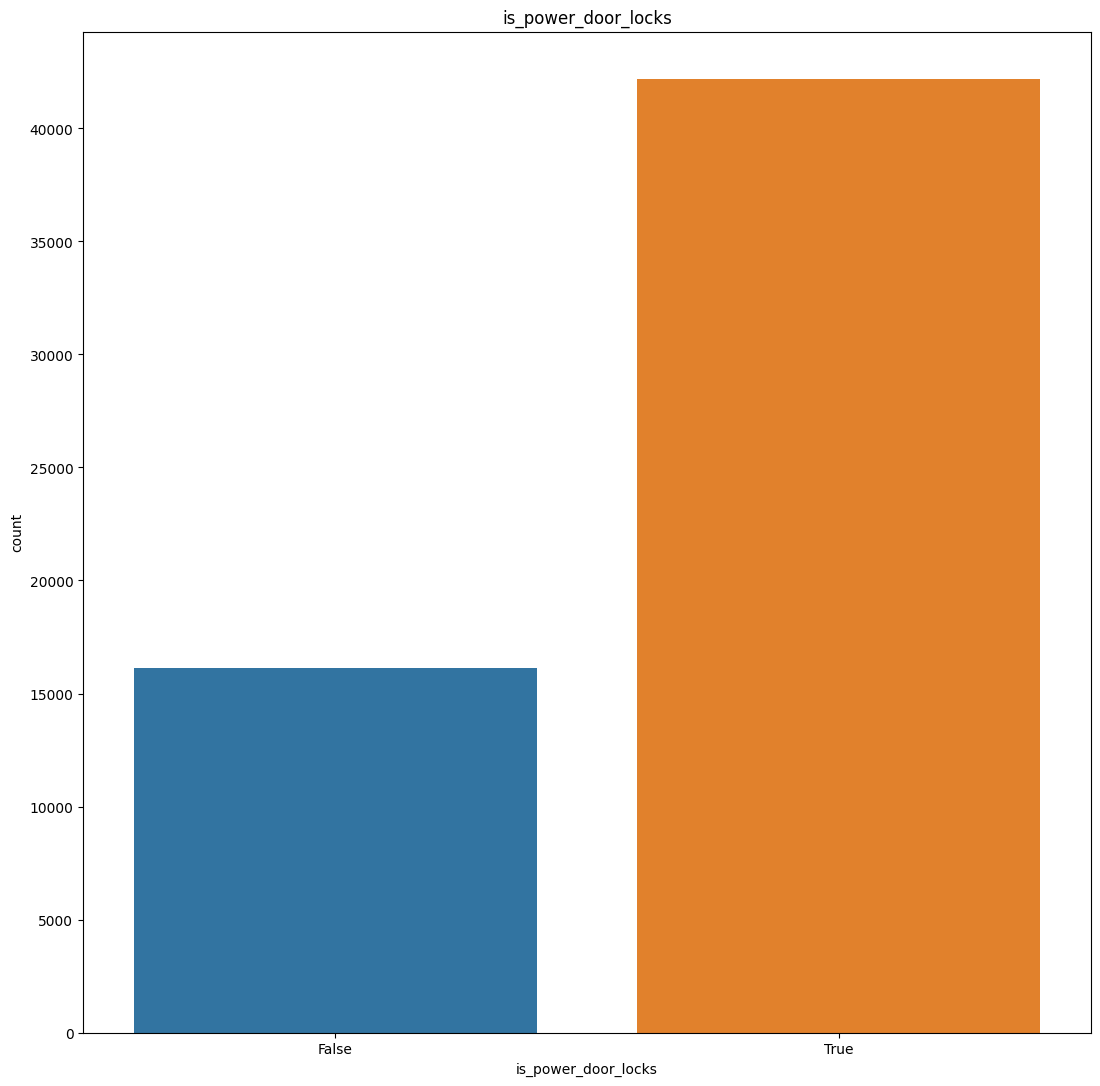

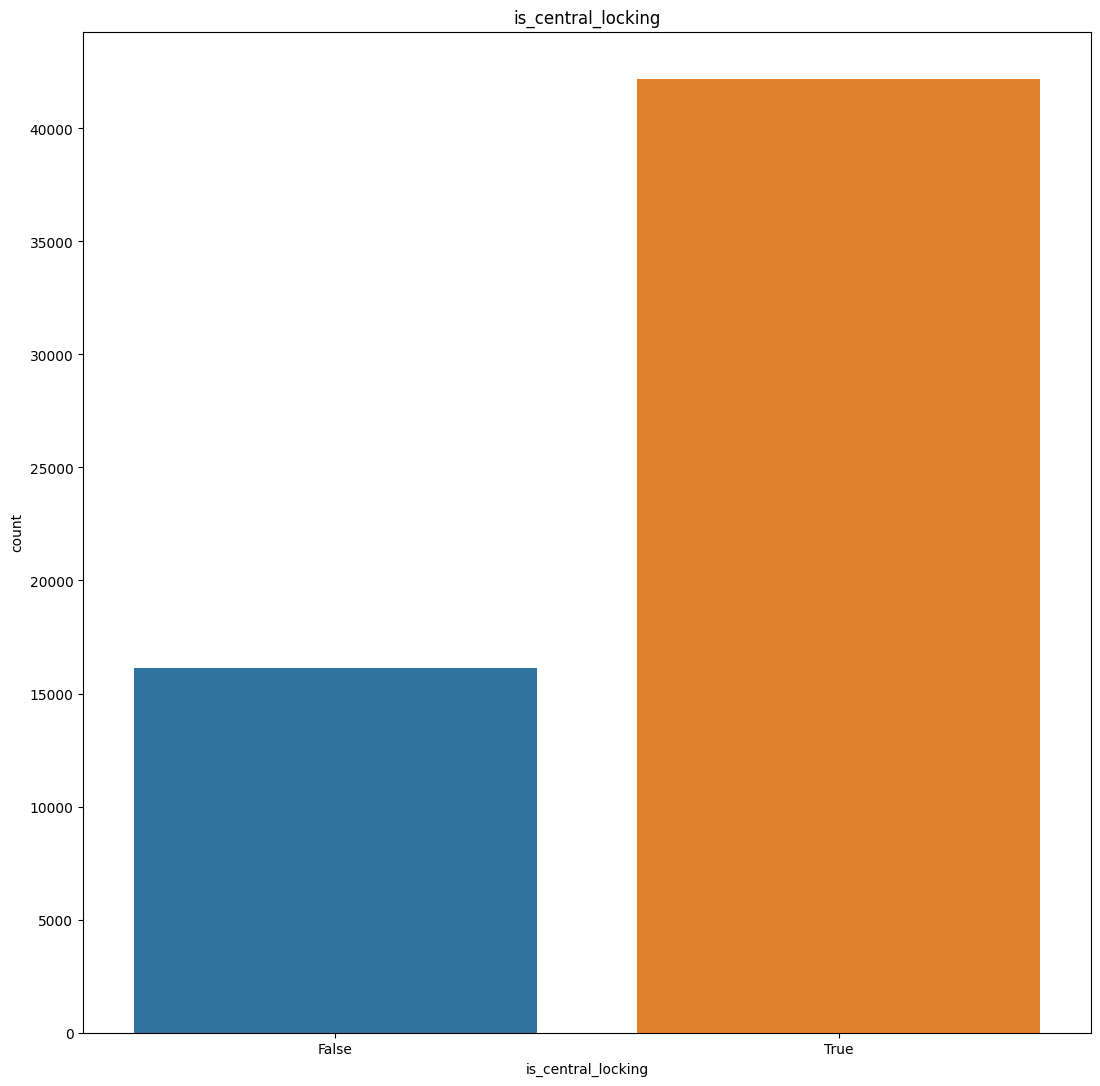

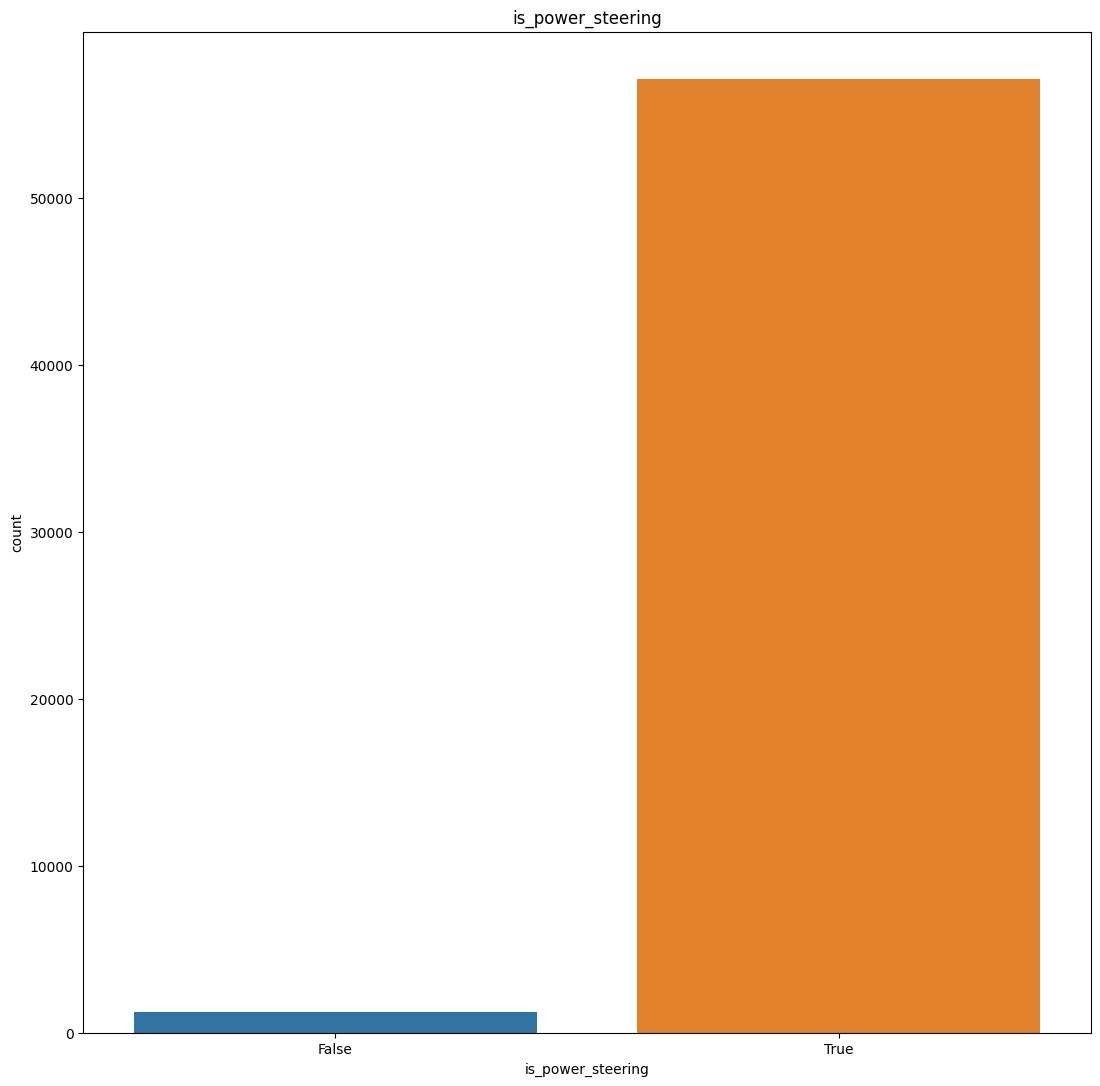

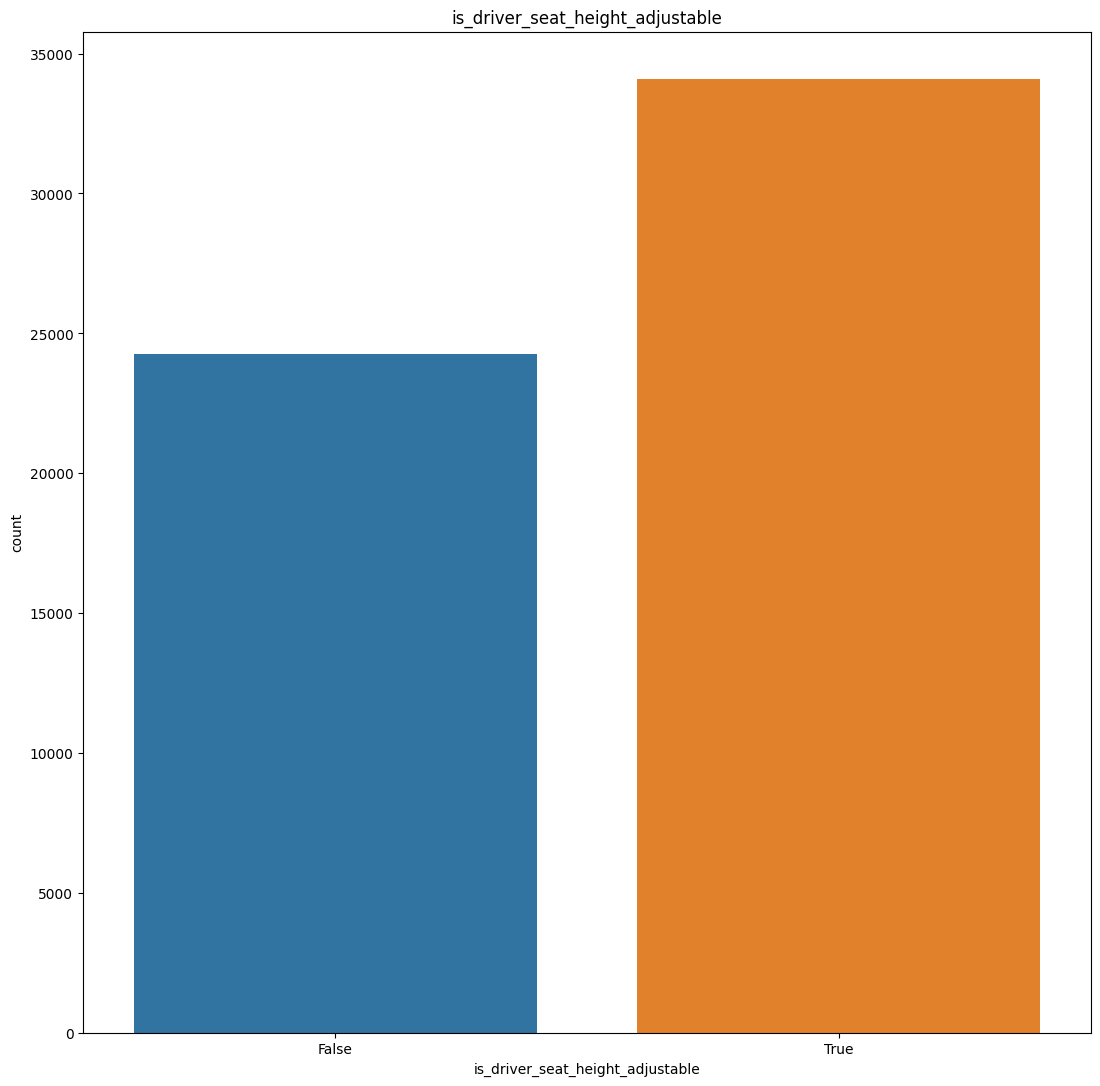

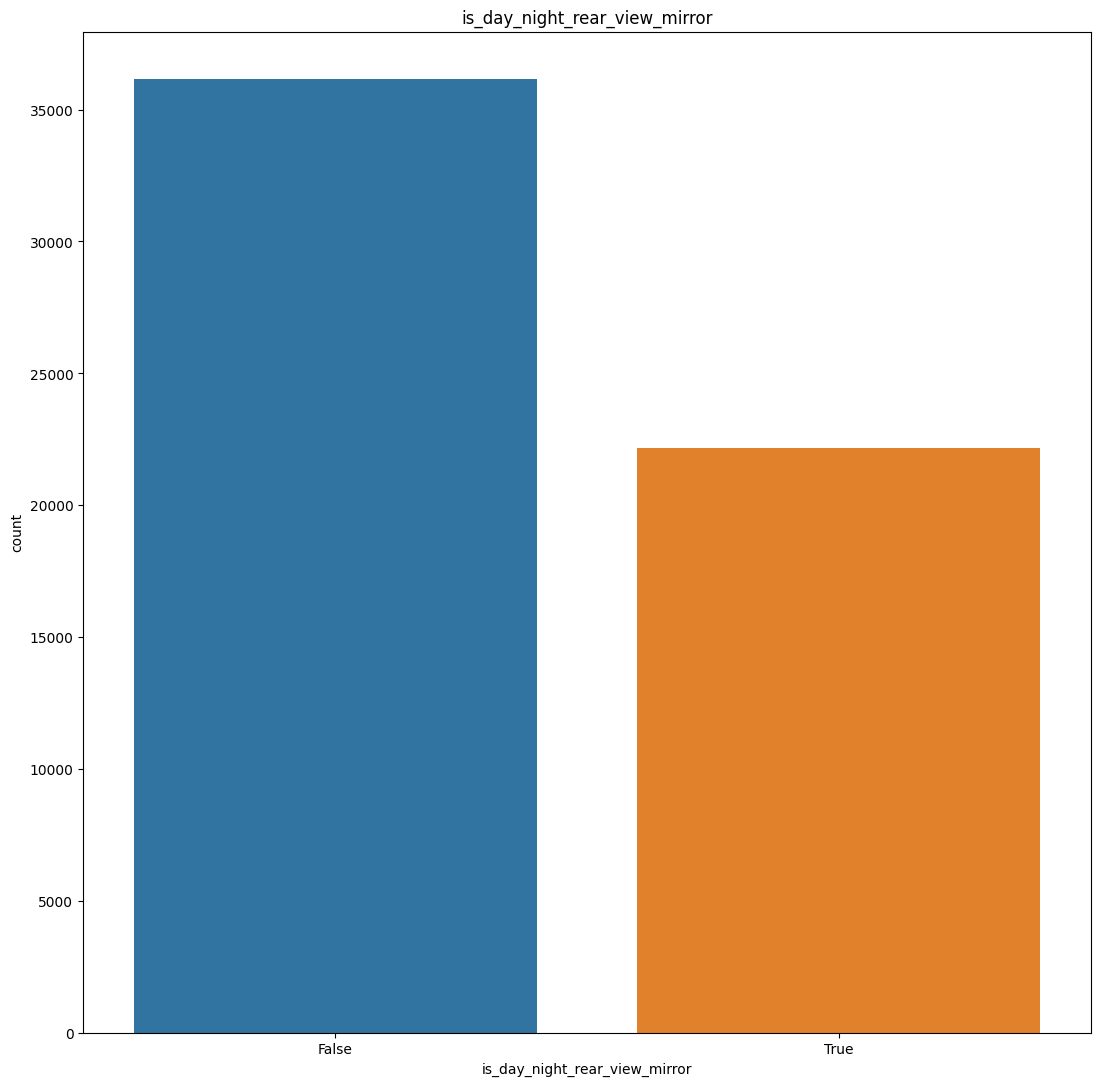

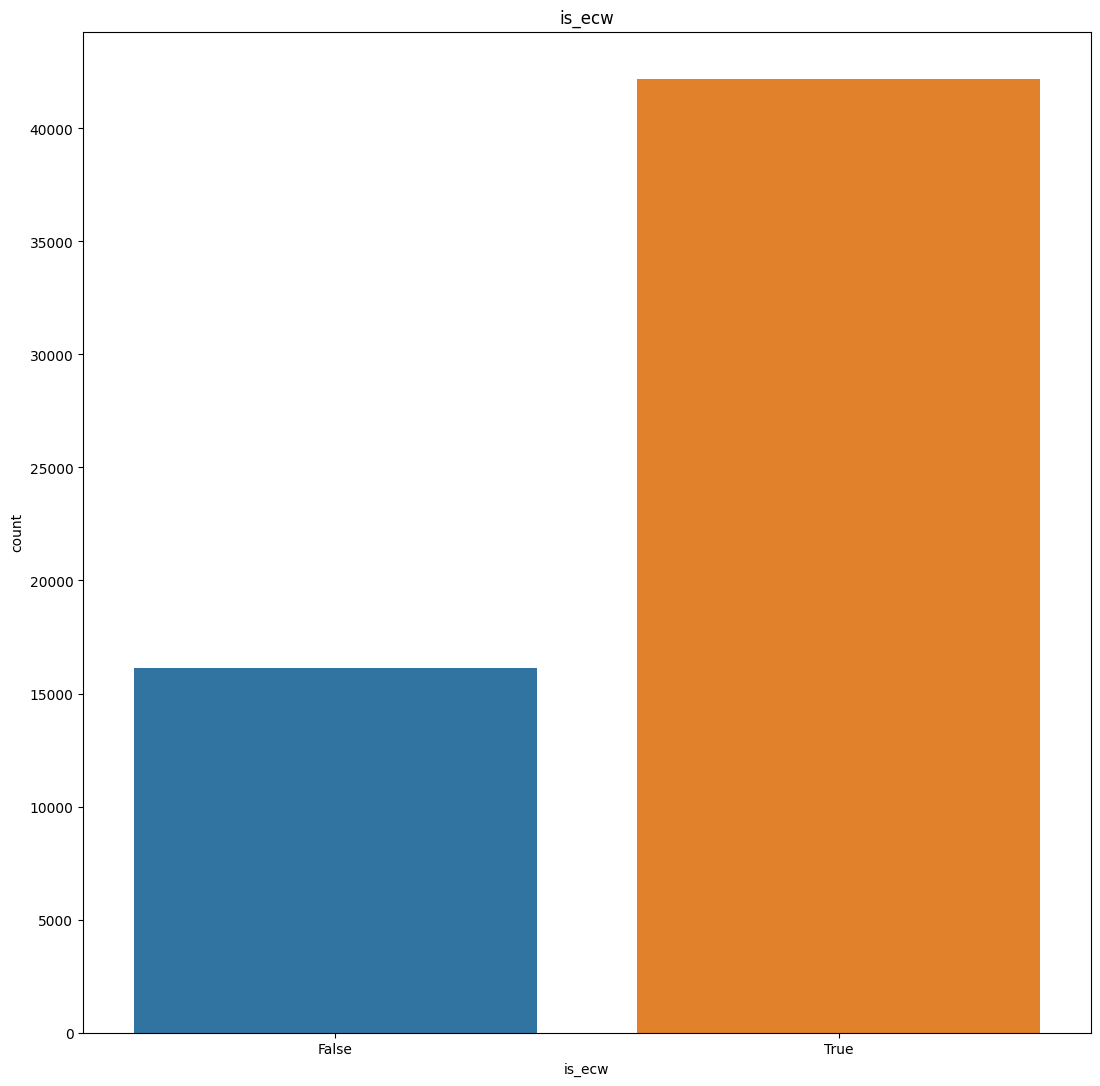

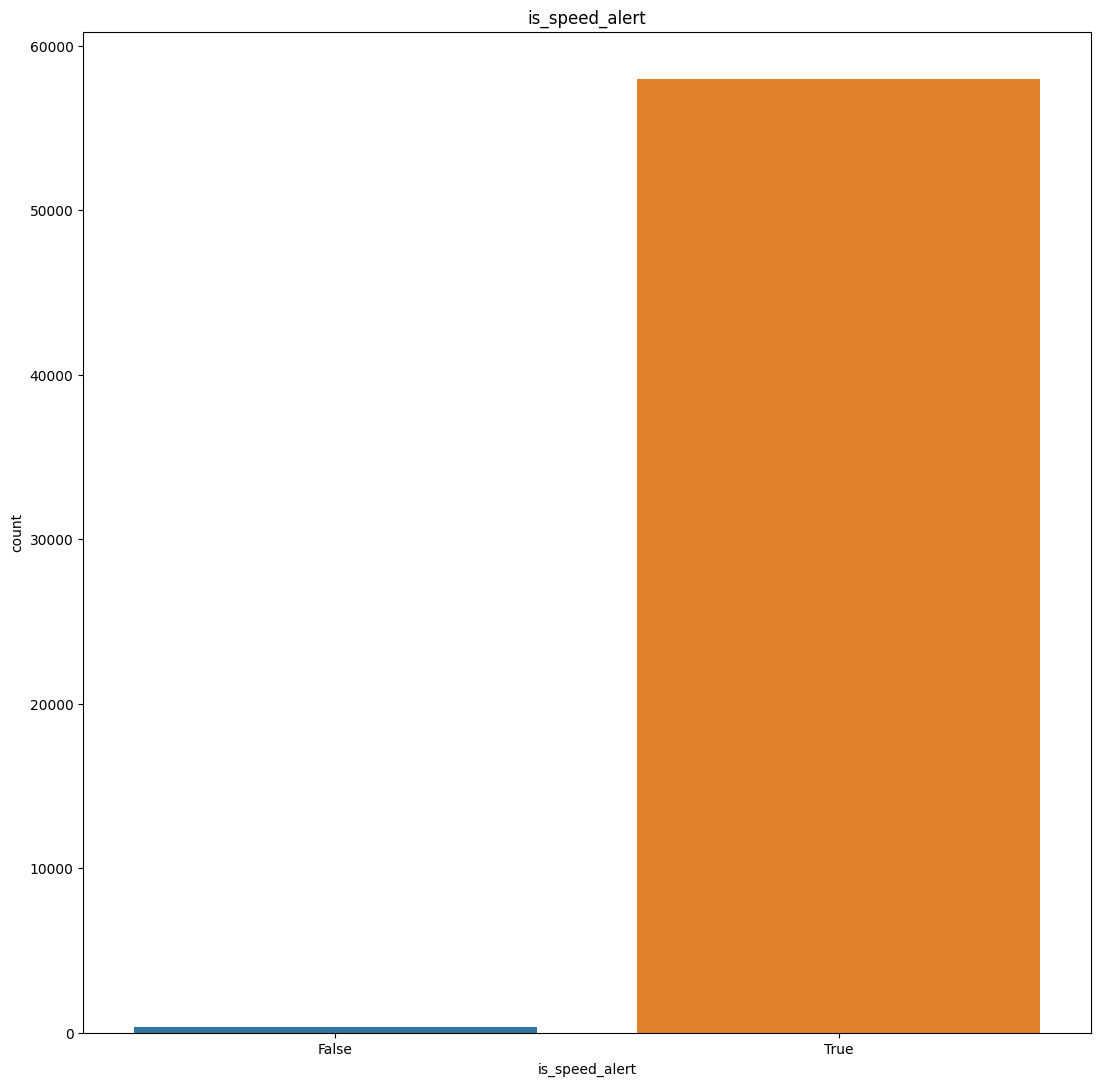

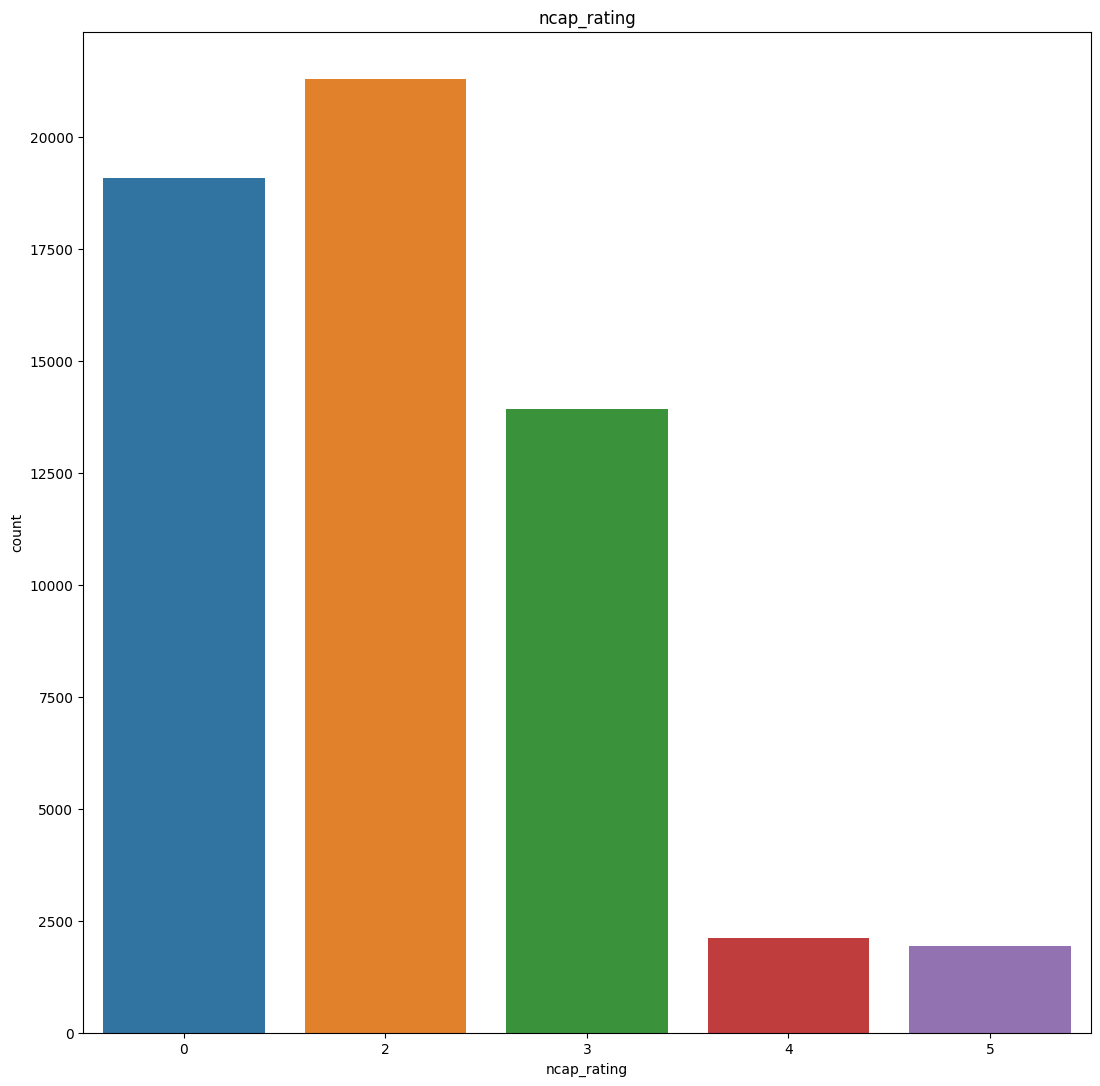

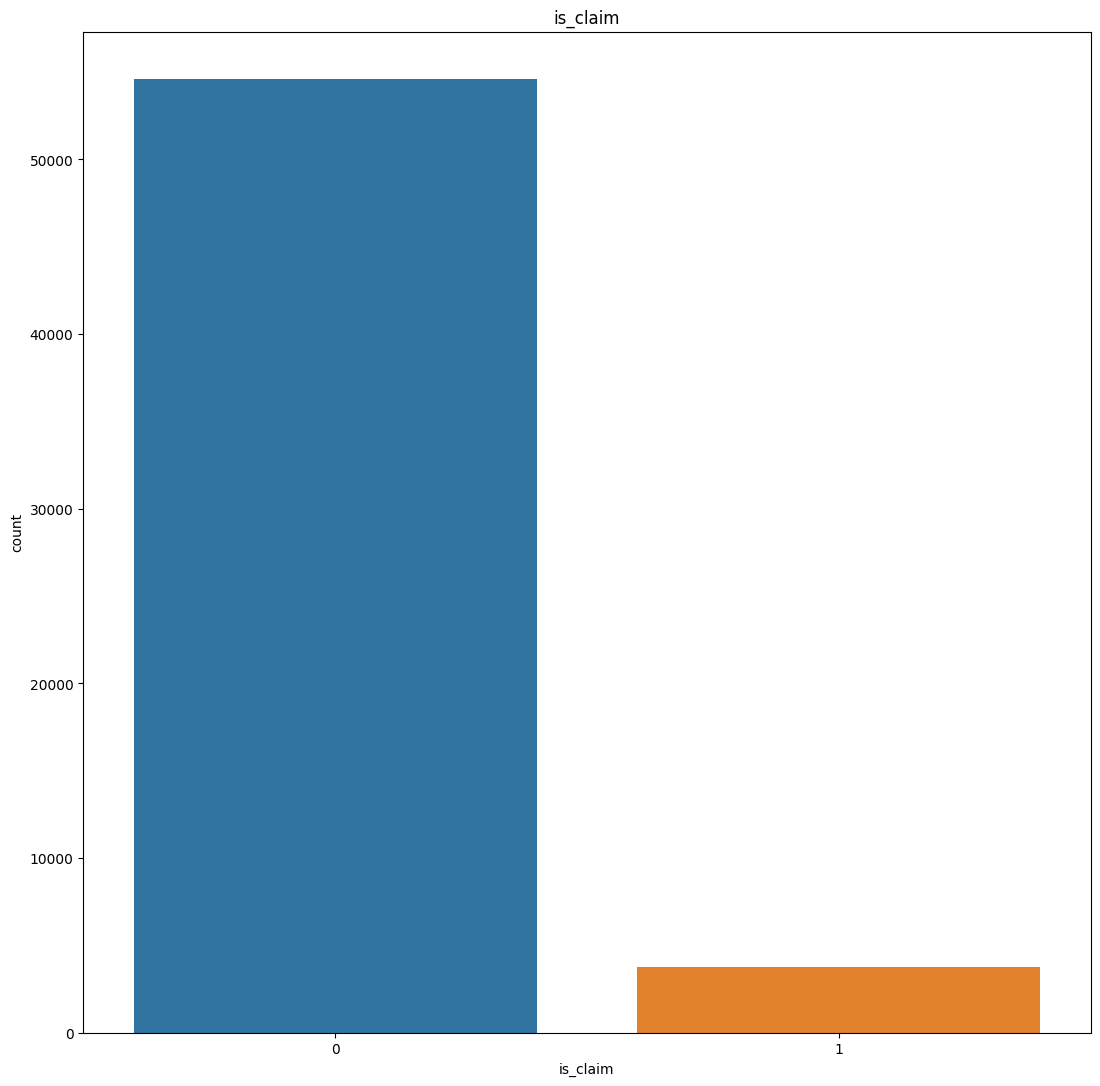

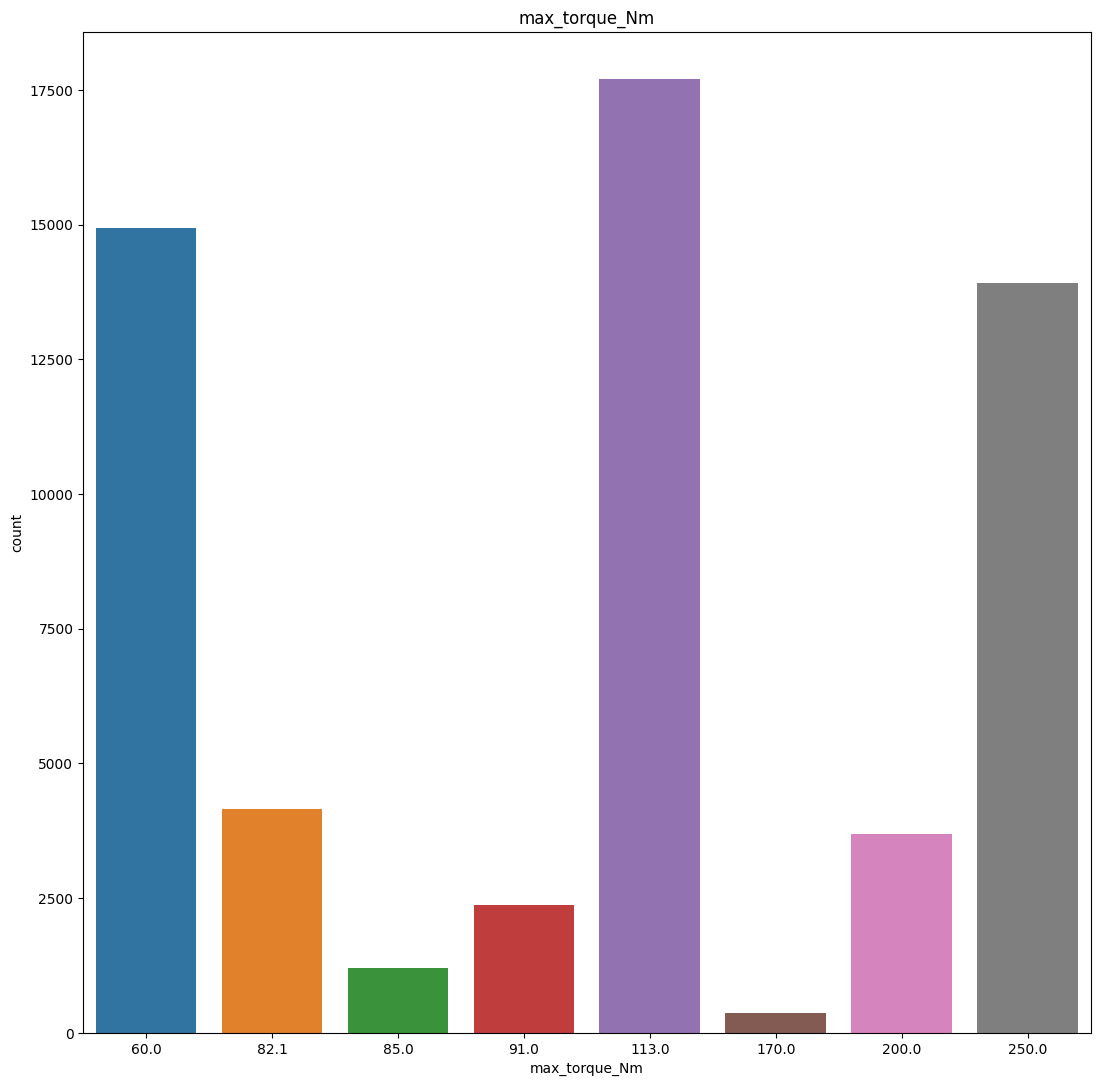

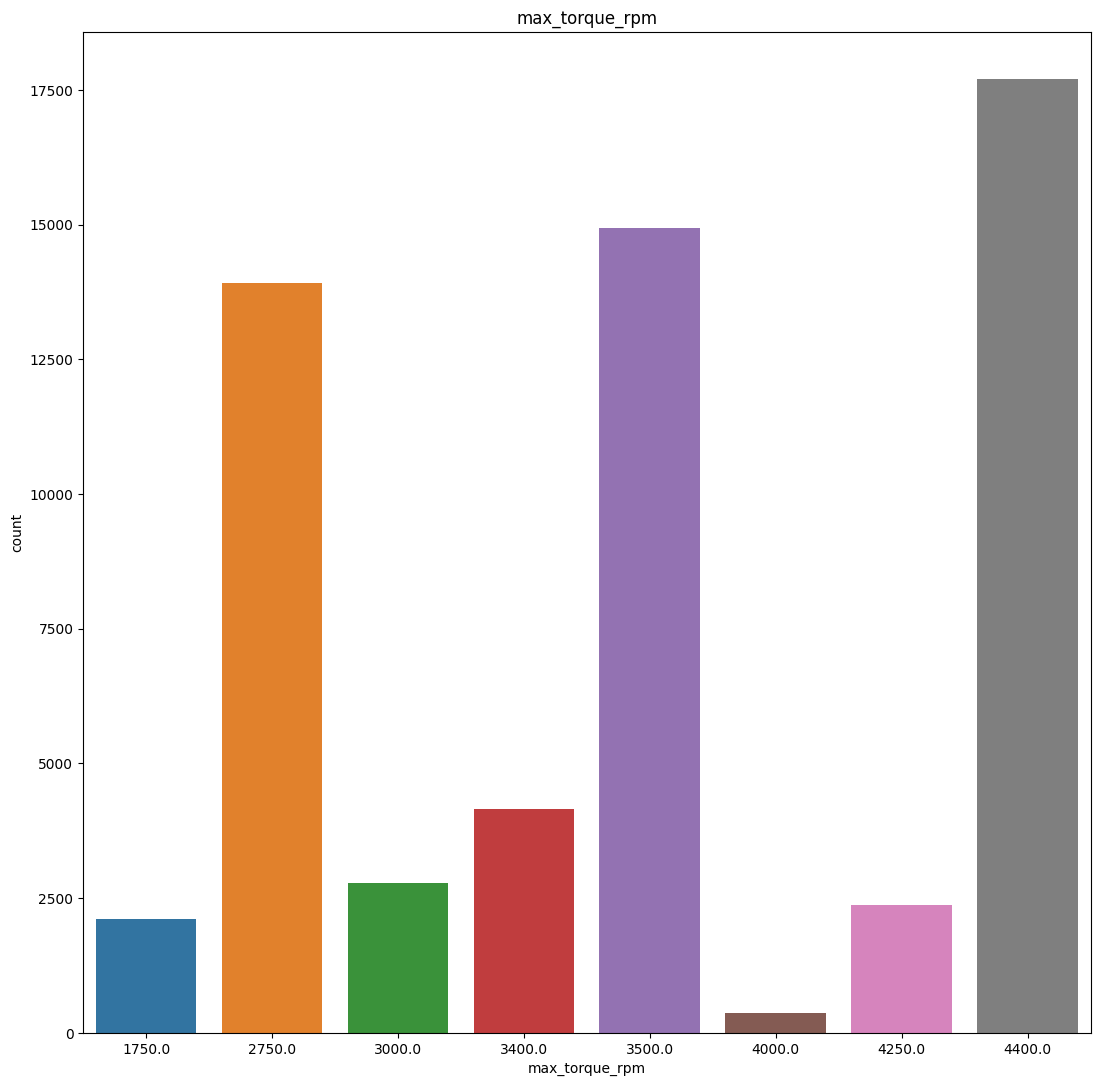

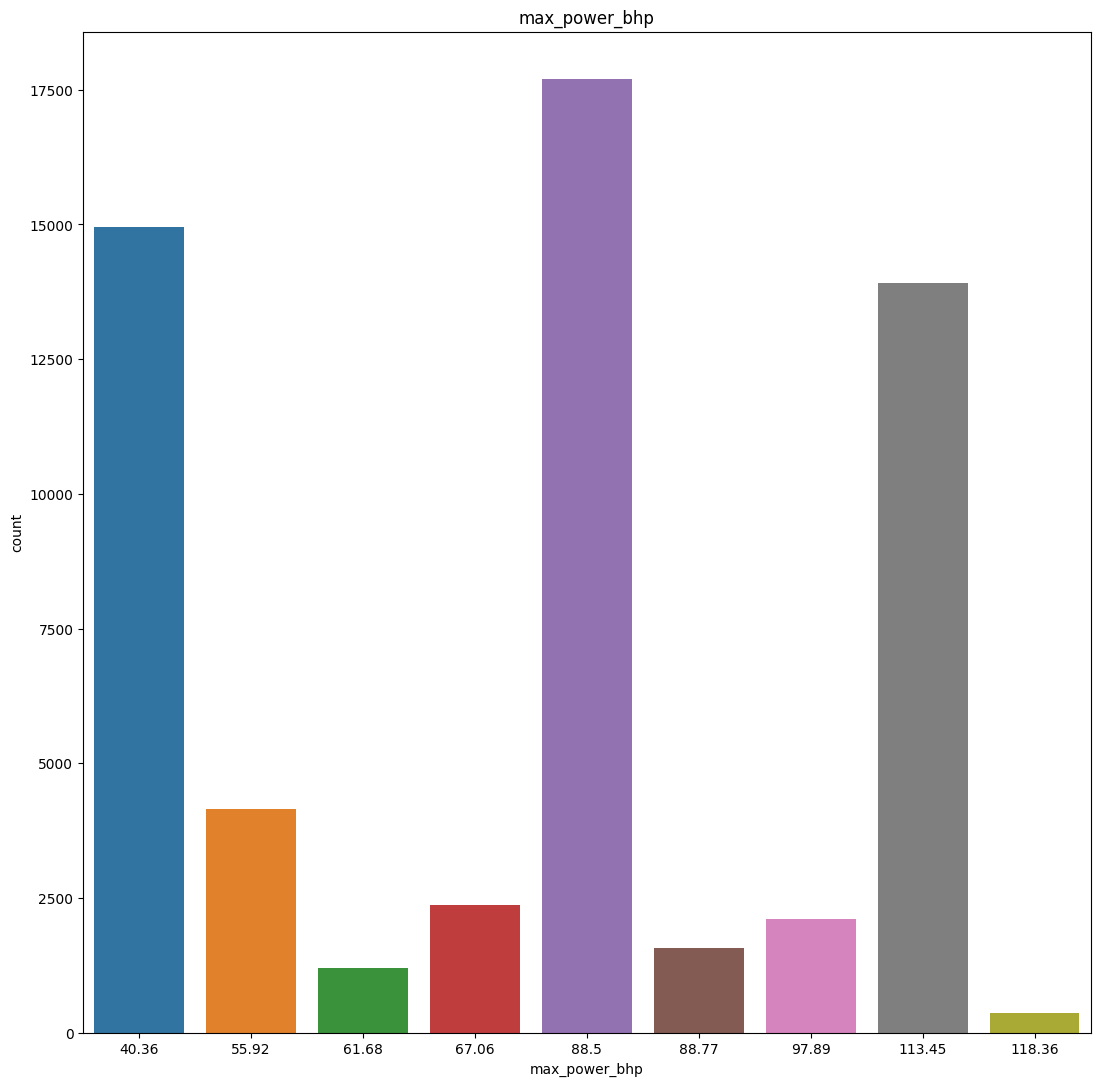

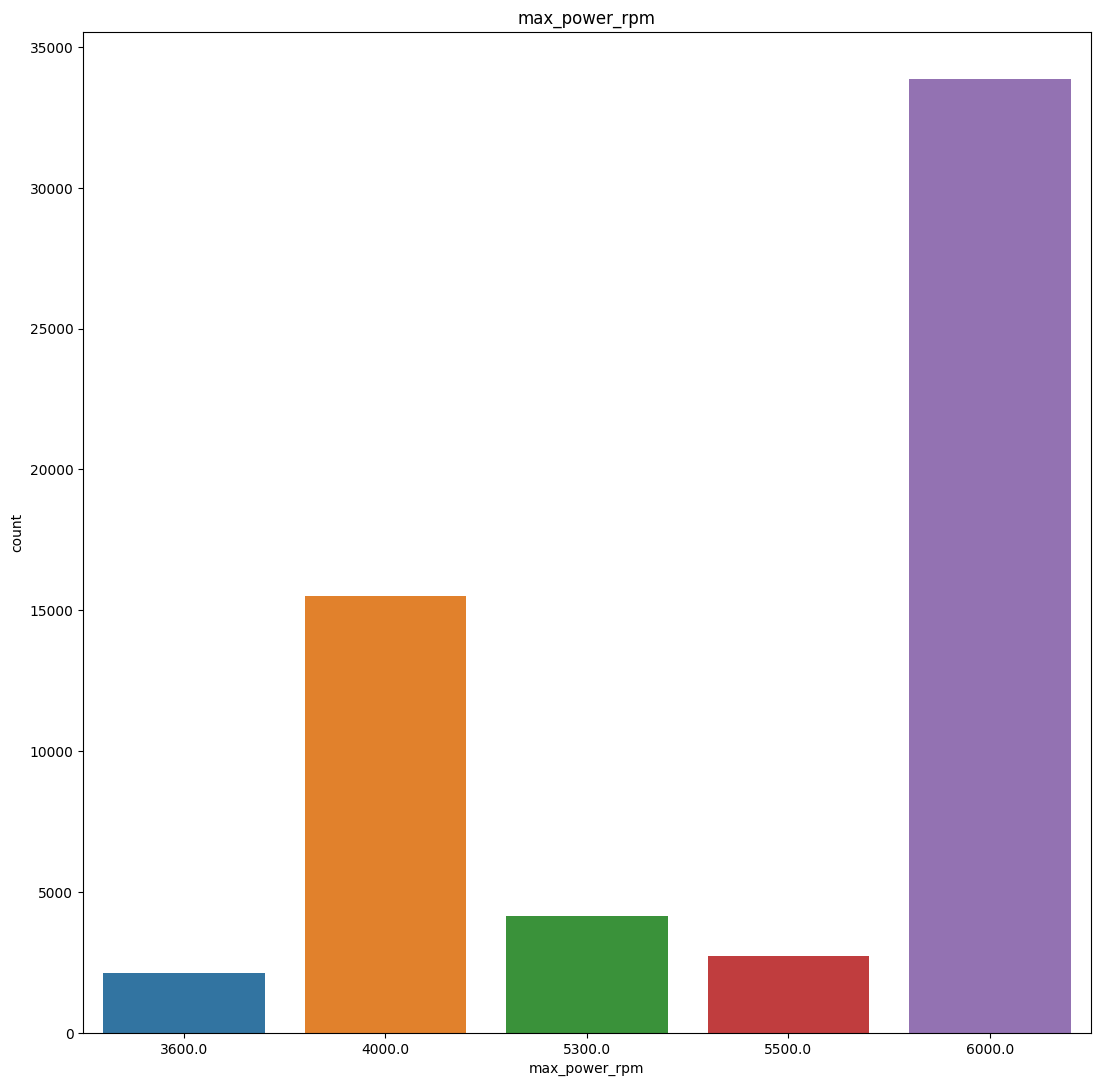

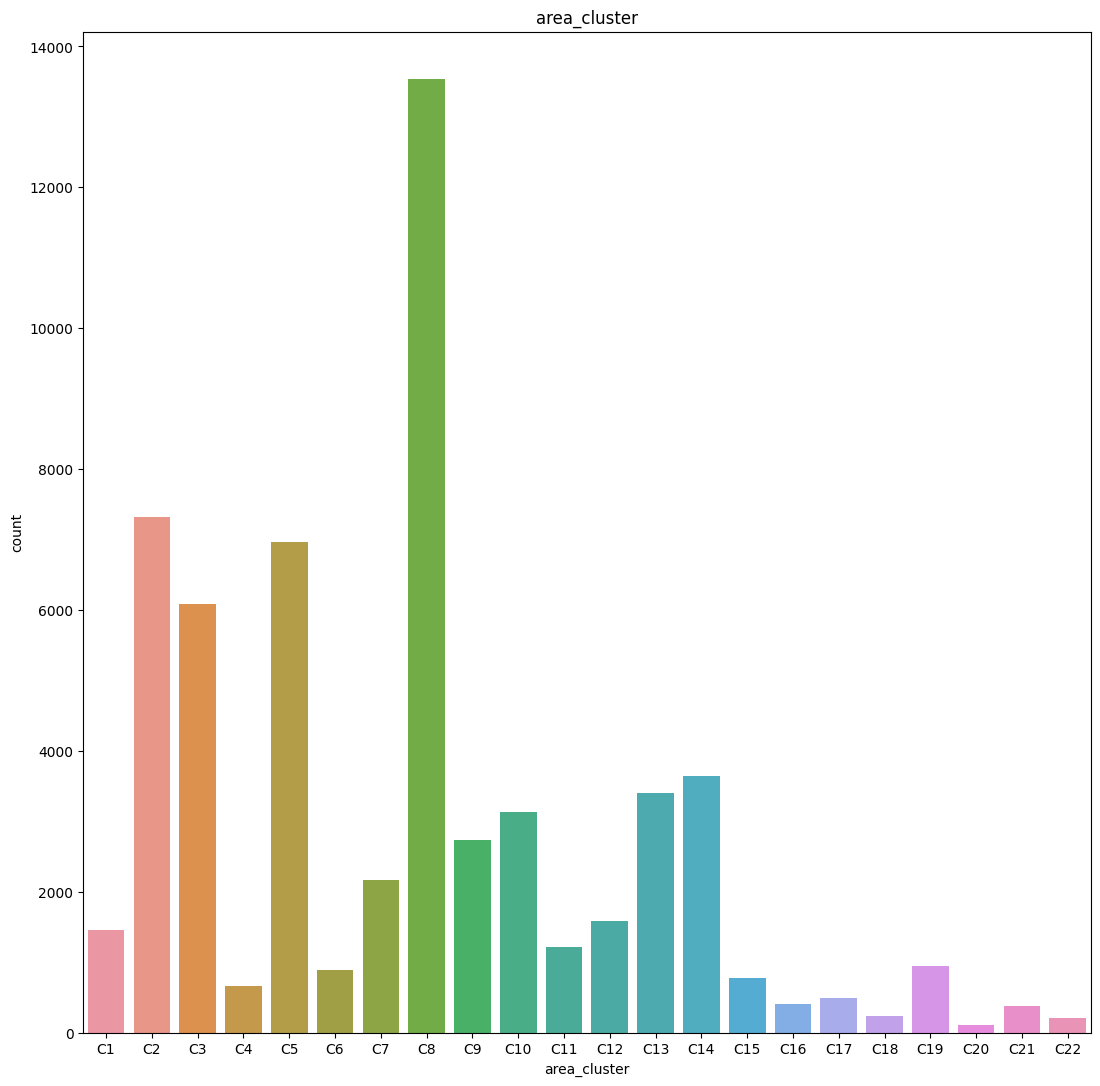

In [75]:
for i in cat_list:
    plt.figure(figsize=(13,13))
    sb.countplot(x=i,data=data.loc[:,cat_list])
    plt.title(i)

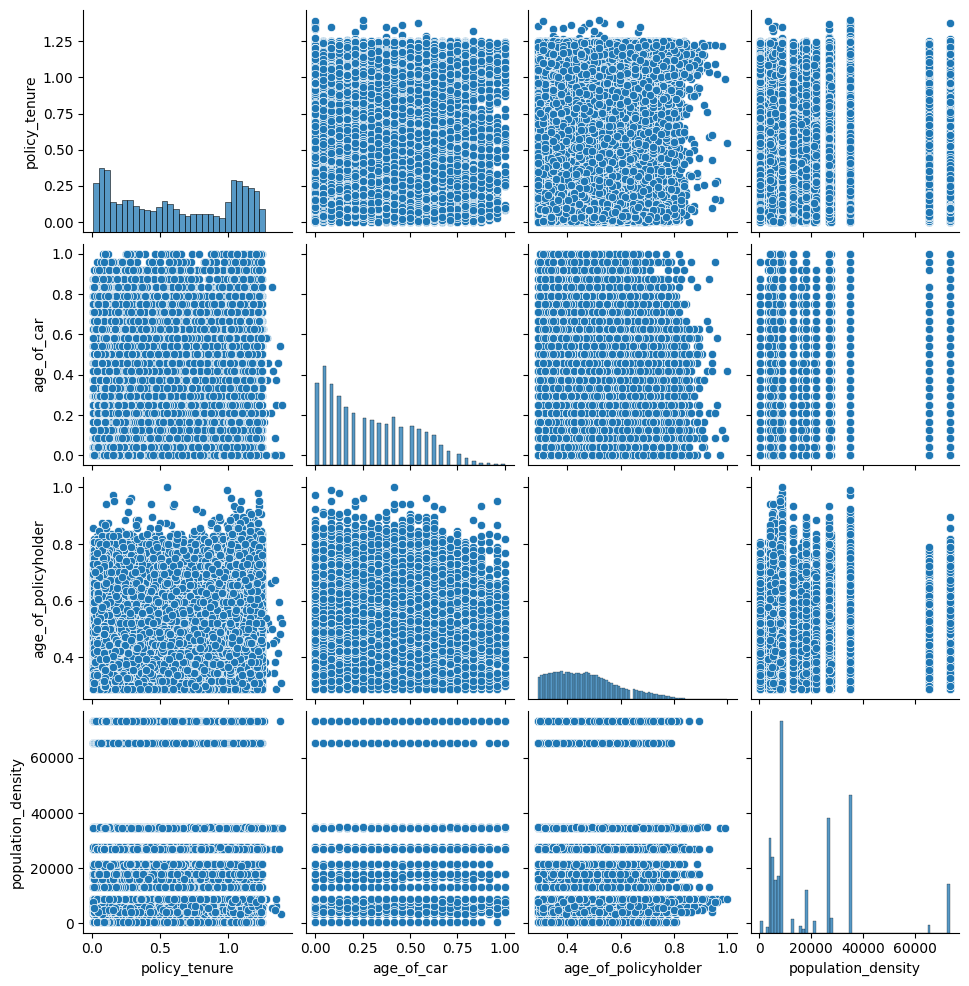

In [76]:
sb.pairplot(data.loc[:,num_list])


array([[<Axes: title={'center': 'policy_tenure'}>,
        <Axes: title={'center': 'age_of_car'}>,
        <Axes: title={'center': 'age_of_policyholder'}>,
        <Axes: title={'center': 'population_density'}>],
       [<Axes: title={'center': 'make'}>,
        <Axes: title={'center': 'airbags'}>,
        <Axes: title={'center': 'displacement'}>,
        <Axes: title={'center': 'cylinder'}>],
       [<Axes: title={'center': 'gear_box'}>,
        <Axes: title={'center': 'turning_radius'}>,
        <Axes: title={'center': 'length'}>,
        <Axes: title={'center': 'width'}>],
       [<Axes: title={'center': 'height'}>,
        <Axes: title={'center': 'gross_weight'}>,
        <Axes: title={'center': 'ncap_rating'}>,
        <Axes: title={'center': 'is_claim'}>],
       [<Axes: title={'center': 'max_torque_Nm'}>,
        <Axes: title={'center': 'max_torque_rpm'}>,
        <Axes: title={'center': 'max_power_bhp'}>,
        <Axes: title={'center': 'max_power_rpm'}>]], dtype=object)

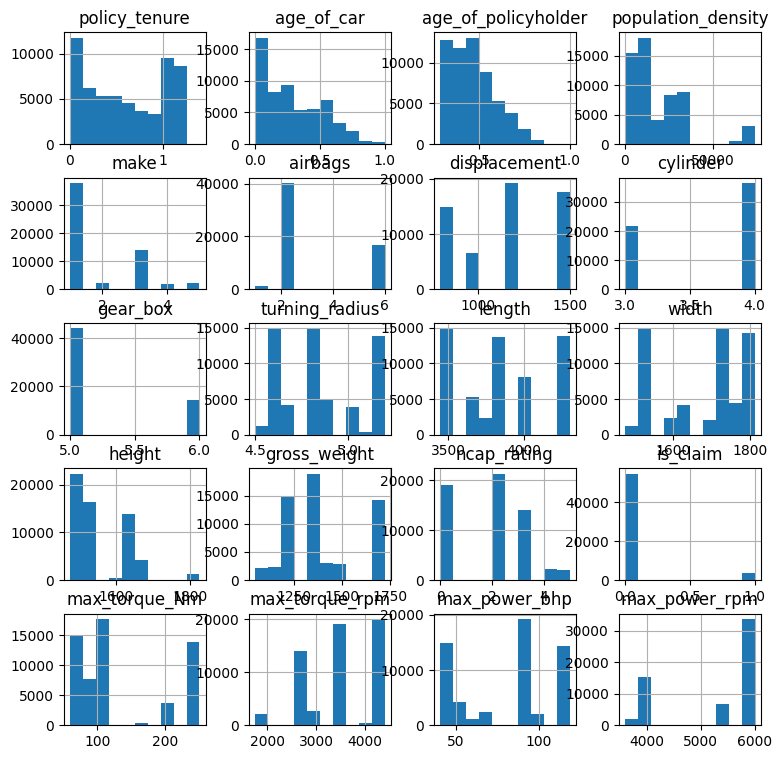

In [77]:
data.hist(figsize=(9,9))


Let's see how each column affects the label

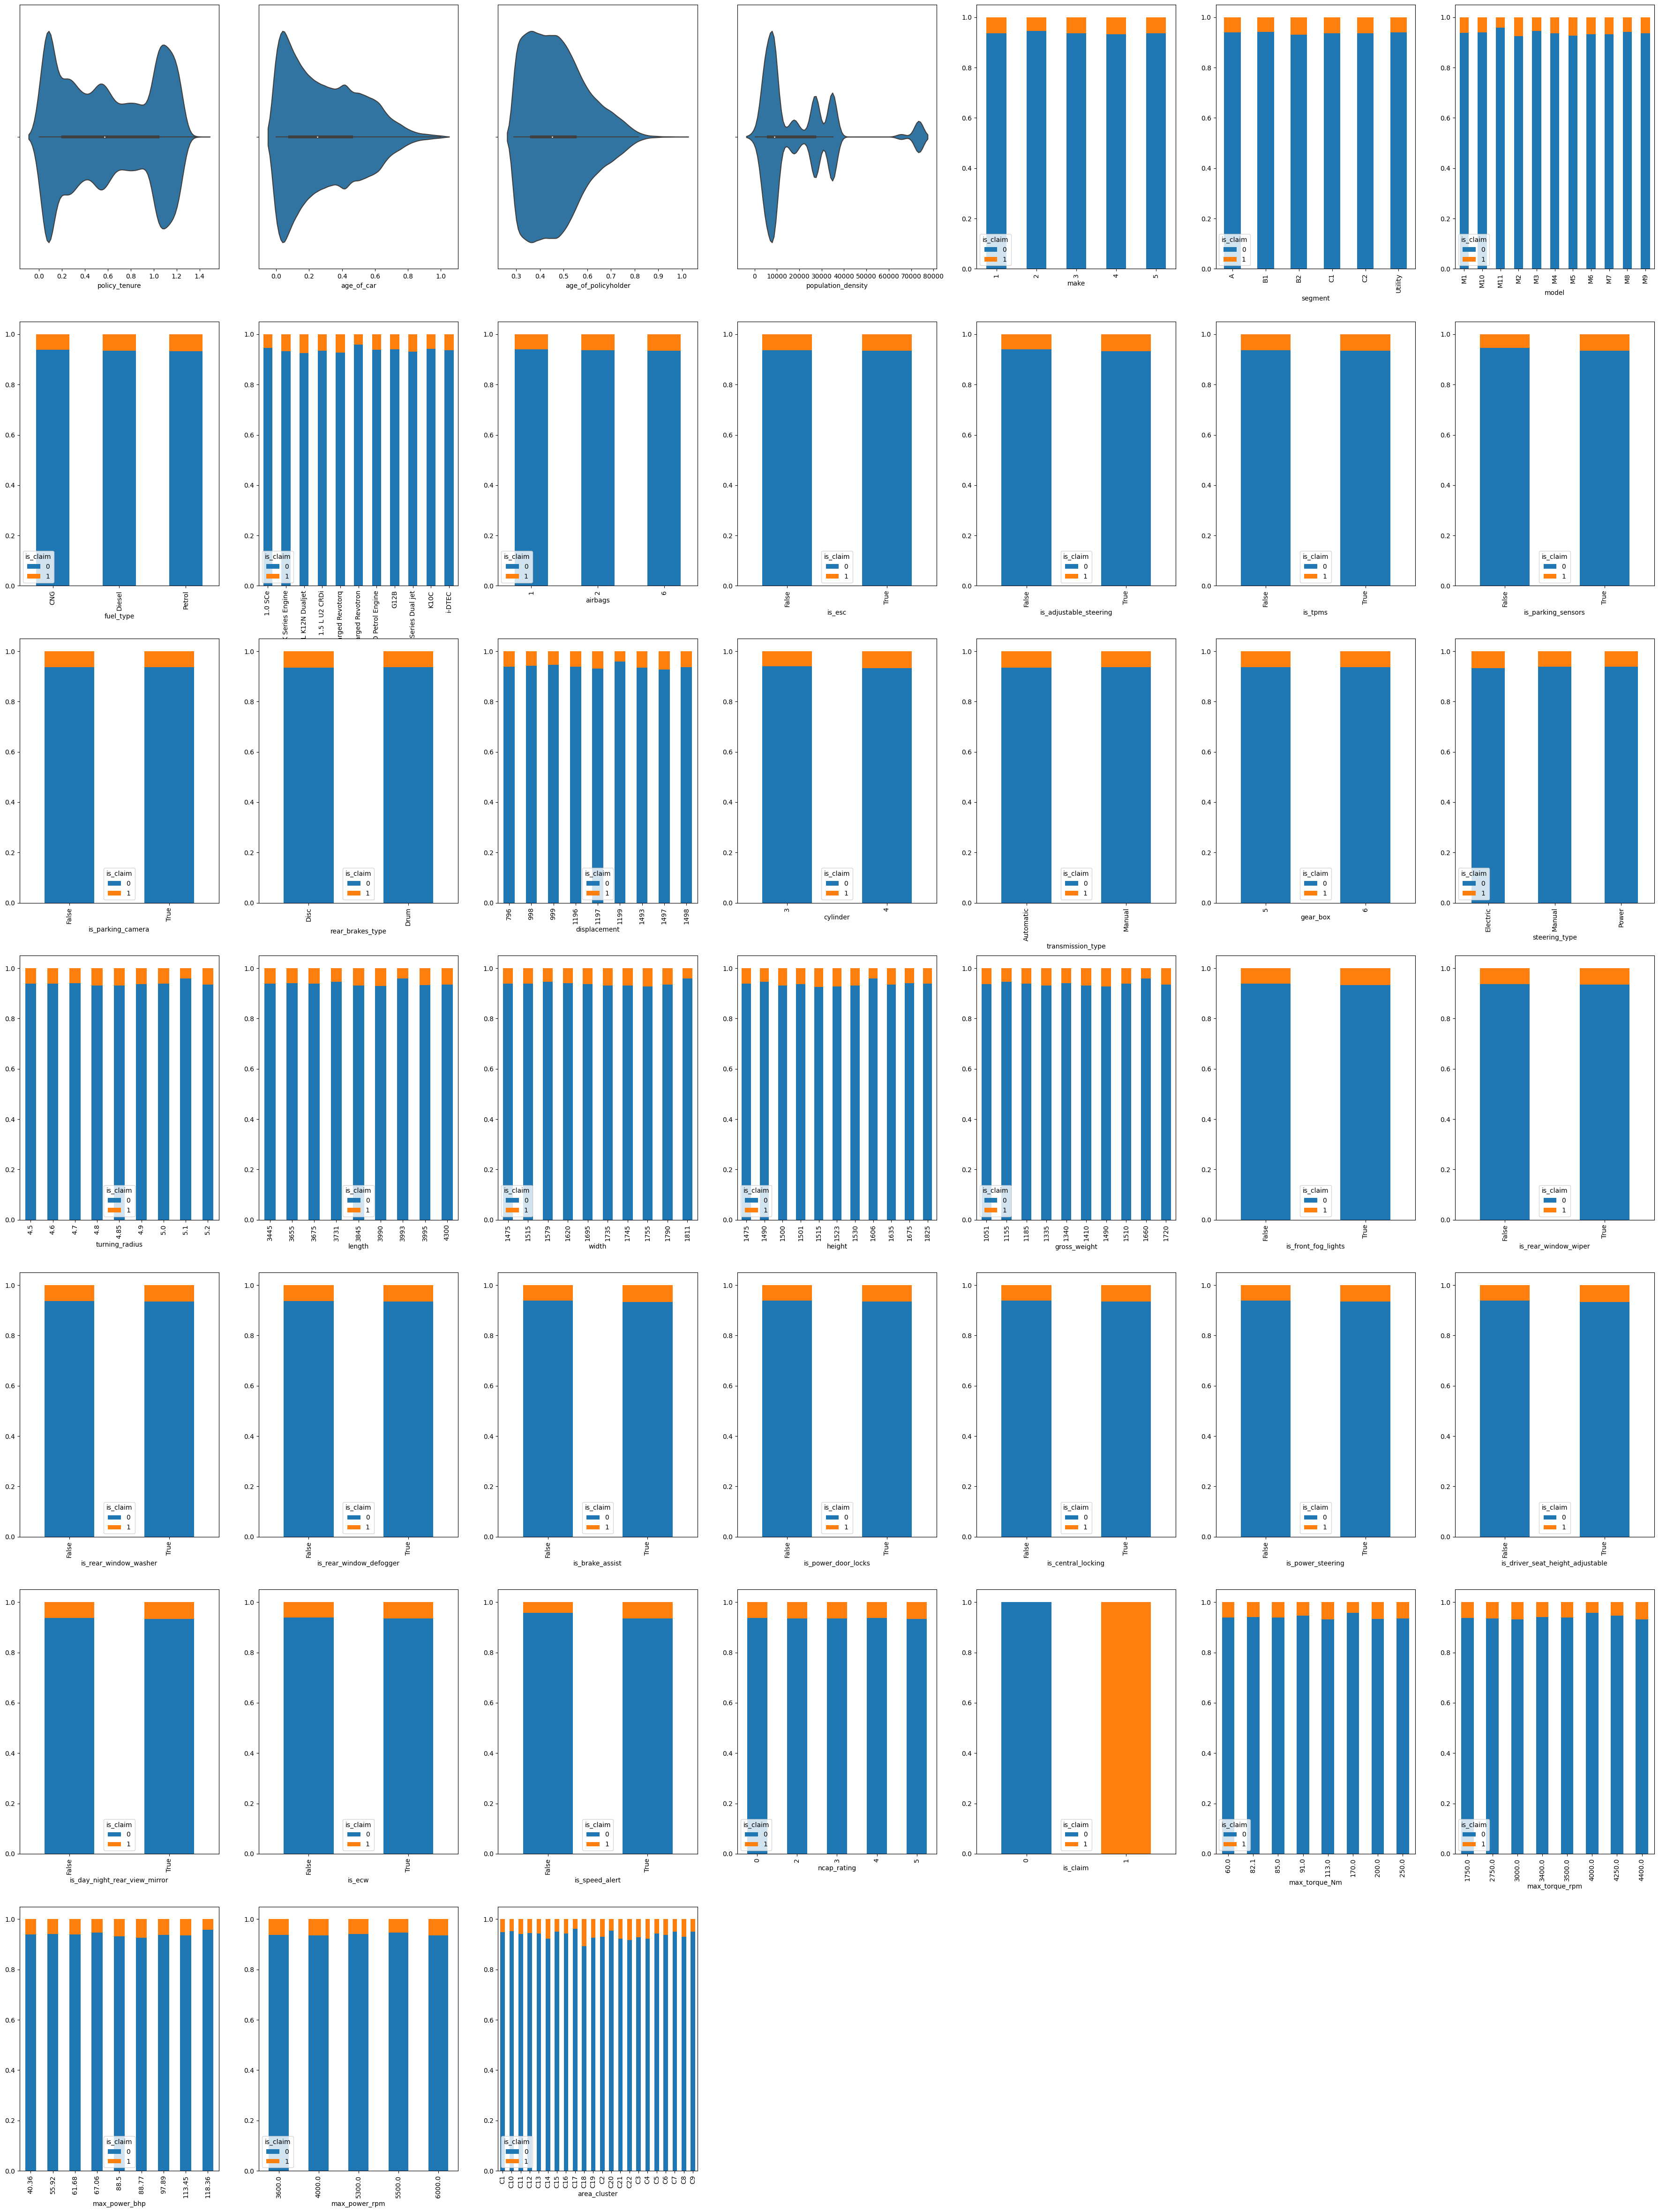

In [78]:
plt.figure(figsize=(45,60))
import math
num_rows = math.ceil(math.sqrt(len(num_list)+len(cat_list)))

for (index,num) in enumerate(num_list):
    plt.subplot(num_rows,num_rows,index+1)
    sb.violinplot(x =num,hue ='is_claim', data=data)

for (index,cat) in enumerate(cat_list):
    plt.subplot(num_rows,num_rows,len(num_list)+index+1)
    category_proportions = data.groupby(cat)['is_claim'].value_counts(normalize=True).unstack()
    category_proportions.plot(kind='bar', stacked=True, ax=plt.gca())

plt.show()

Finally, we need to encode the remaining columns that are still of type object.
Segment seems to be ordinal, as a car whose segment is A is smaller than a car whose segment is B1, which is smaller than a car whose segment is B2 and so on.
rear_brakes_type can be converted to a binary column, representing if the breaks are of type disc or not (if not, then they are of type drum).
Simillarly, transmission_type can be converted into a binary column representing if the transmission is automatic or not (i.e. manual).
For all other (5) columns that are still objects, we used one-hot encoding since they are categorical.

In [79]:
data['segment'] = data['segment'].replace({'A': 0, 'B1': 1, 'B2': 2, 'C1': 3, 'C2': 4,'Utility': 5})
data['rear_brakes_type'] = data['rear_brakes_type'].replace({'Disc':True,'Drum':False})
data['transmission_type'] = data['transmission_type'].replace({'Automatic':True,'Manual':False})

partial_data = data.loc[:,num_list + ["displacement",
"is_speed_alert",
"area_cluster",
"engine_type",
"model",
"turning_radius",
"length",
"width",
"height",
"gross_weight",
"max_torque_Nm",
"max_torque_rpm",
"max_power_bhp",
"is_claim"]]

categorical_cols = data.select_dtypes(include=['object']).columns

categories_encoded_data = pd.get_dummies(data, columns=categorical_cols)

categories_encoded_data.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 58323 entries, 0 to 58591
Data columns (total 90 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   policy_tenure                          58323 non-null  float64
 1   age_of_car                             58323 non-null  float64
 2   age_of_policyholder                    58323 non-null  float64
 3   population_density                     58323 non-null  int64  
 4   make                                   58323 non-null  int64  
 5   segment                                58323 non-null  int64  
 6   airbags                                58323 non-null  int64  
 7   is_esc                                 58323 non-null  bool   
 8   is_adjustable_steering                 58323 non-null  bool   
 9   is_tpms                                58323 non-null  bool   
 10  is_parking_sensors                     58323 non-null  bool   
 11  is

Now that we analyzed the data, we can start creating the models. First let's split the data into train and test data. Each of this groups also needs to be split into inputs and labels

In [80]:
from sklearn.model_selection import train_test_split

inputs = categories_encoded_data.drop("is_claim", axis=1)
labels = categories_encoded_data['is_claim'].values

inputs_train, inputs_test, label_train, label_test = train_test_split(inputs,labels,test_size = 0.20, random_state = 42)

Like we said previously, the data is skewed in terms of the label. This means we need to balance the data somehow. We'll try different method and see which yields better results:
<ul>
<li>Doing nothing at all</li>
<li>Random Oversampling</li>
<li>Random Undersampling</li>
<li>SMOTENC (Oversampling)</li>
<li>ENN (Undersampling)</li>
<li>SMOTEENN (Hybrid)</li>
</ul>

In [81]:
from imblearn.combine import SMOTEENN
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import EditedNearestNeighbours
from imblearn.under_sampling import RandomUnderSampler


ros = RandomOverSampler()
inputs_train_ros,label_train_ros = ros.fit_resample(inputs_train,label_train)

smote = SMOTE()
inputs_train_smote,label_train_smote = smote.fit_resample(inputs_train,label_train)

rus = RandomUnderSampler()
inputs_train_rus,label_train_rus = rus.fit_resample(inputs_train,label_train)


enn = EditedNearestNeighbours()
inputs_train_enn,label_train_enn = enn.fit_resample(inputs_train,label_train)


smoteenn = SMOTEENN()
inputs_train_smoteen,label_train_smoteen = smoteenn.fit_resample(inputs_train,label_train)

In [82]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron


clf_1 = KNeighborsClassifier()
clf_2 = DecisionTreeClassifier()
clf_3 = GaussianNB()
clf_4 = Perceptron()

clf_list = [clf_1,clf_2,clf_3,clf_4]

def apply_model_and_get_stats(model,x_test,y_test):
    y_pred = model.predict(x_test)

    accuracy = accuracy_score(y_test, y_pred)

    # Calculate precision
    precision = precision_score(y_test, y_pred, average='binary')

    # Calculate recall
    recall = recall_score(y_test, y_pred, average='binary')

    # Calculate F1-score
    f1 = f1_score(y_test, y_pred, average='binary')

    # Print the results
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1-score:", f1)
    return y_pred

balancing_algorithms = [(inputs_train, label_train), (inputs_train_ros, label_train_ros), (inputs_train_rus, label_train_rus),
(inputs_train_smote,label_train_smote), (inputs_train_enn,label_train_enn ),(inputs_train_smoteen,label_train_smoteen)]
balancing_algorithm_str = ["nothing","Random Oversampling", "Random Undersampling", "smote","enn","smoteenn"]

for index,balancing_algorithm in enumerate(balancing_algorithms):
    inputs,label = balancing_algorithm
    print(balancing_algorithm_str[index])
    for index2,clf in enumerate(clf_list):
        print(clf)
        clf.fit(inputs,label)
        y_pred = apply_model_and_get_stats(clf,inputs_test,label_test)
        print()
        print()
    print()
    print()
    print()

nothing
KNeighborsClassifier()
Accuracy: 0.9310758679811402
Precision: 0.02
Recall: 0.0013227513227513227
F1-score: 0.0024813895781637713


DecisionTreeClassifier()
Accuracy: 0.871067295327904
Precision: 0.07977528089887641
Recall: 0.09391534391534391
F1-score: 0.08626974483596597


GaussianNB()
Accuracy: 0.9351907415345049
Precision: 0.0
Recall: 0.0
F1-score: 0.0


Perceptron()


/home/joaorr13/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/joaorr13/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy: 0.9351907415345049
Precision: 0.0
Recall: 0.0
F1-score: 0.0





Random Oversampling
KNeighborsClassifier()
Accuracy: 0.7862837548221174
Precision: 0.08144578313253012
Recall: 0.22354497354497355
F1-score: 0.1193924408336277


DecisionTreeClassifier()
Accuracy: 0.8807543934847836
Precision: 0.07835325365205843
Recall: 0.07804232804232804
F1-score: 0.0781974817760106


GaussianNB()
Accuracy: 0.4262323189027004
Precision: 0.06809253601047577
Recall: 0.6190476190476191
F1-score: 0.12268973653165549


Perceptron()
Accuracy: 0.10767252464637805
Precision: 0.0652193496081434
Recall: 0.9576719576719577
F1-score: 0.12212195327654549





Random Undersampling
KNeighborsClassifier()
Accuracy: 0.5495927989712817
Precision: 0.08087961237420797
Recall: 0.5740740740740741
F1-score: 0.14178373080692586


DecisionTreeClassifier()
Accuracy: 0.5333904843549079
Precision: 0.07873449577566062
Recall: 0.5793650793650794
F1-score: 0.1386295299889223


GaussianNB()
Accuracy: 0.43240462923274753
Pre

/home/joaorr13/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/joaorr13/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy: 0.633690527218174
Precision: 0.07880239520958084
Recall: 0.4351851851851852
F1-score: 0.13344149259785032


DecisionTreeClassifier()
Accuracy: 0.8001714530647235
Precision: 0.0892018779342723
Recall: 0.2261904761904762
F1-score: 0.12794612794612795


GaussianNB()
Accuracy: 0.4114873553364766
Precision: 0.06814647250106037
Recall: 0.6375661375661376
F1-score: 0.12313194533145996


Perceptron()
Accuracy: 0.3207029575653665
Precision: 0.06694055099081682
Recall: 0.7328042328042328
F1-score: 0.12267493356953056







As we can see, doing Random Undersampling and SMOTEENN provides us the best results. Moving forward, we will only use these two training datasets

Let's start by using KNN

In [83]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for the grid search
param_grid = {
    'n_neighbors': list(range(1, 16,2)),  # values to test for the number of neighbors
    'weights': ['uniform', 'distance'],  # values to test for the weight function
}


balancing_algorithms = [(inputs_train_rus, label_train_rus),(inputs_train_smoteen,label_train_smoteen)]
balancing_algorithm_str = ["Random Undersampling","smoteenn"]

for index,balancing_algorithm in enumerate(balancing_algorithms):
    inputs,label = balancing_algorithm
    print(balancing_algorithm_str[index])

    # Create an instance of the KNN classifier
    knn = KNeighborsClassifier()

    # Create an instance of GridSearchCV
    grid_search = GridSearchCV(knn, param_grid, cv=5)
    result = grid_search.fit(inputs,label)
    print(f"Best params: {result.best_params_}")

    y_pred = grid_search.predict(inputs_test)

    # Calculate accuracy
    accuracy = accuracy_score(label_test, y_pred)

    # Calculate precision
    precision = precision_score(label_test, y_pred)

    # Calculate recall
    recall = recall_score(label_test, y_pred)

    # Calculate F1 score
    fscore = f1_score(label_test, y_pred)

    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", fscore)
    print()
    print()

Random Undersampling
Best params: {'n_neighbors': 9, 'weights': 'uniform'}
Accuracy: 0.5321045863694813
Precision: 0.0819701280227596
Recall: 0.6097883597883598
F1 Score: 0.1445141065830721


smoteenn
Best params: {'n_neighbors': 1, 'weights': 'uniform'}
Accuracy: 0.6918988426918131
Precision: 0.07742703990470517
Recall: 0.3439153439153439
F1 Score: 0.12639766650461837




Now let's use a Decision Tree

In [84]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for the grid search
param_grid = {
    'max_depth': [None, 5, 10, 20],  # values to test for the maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # values to test for the minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],  # values to test for the minimum number of samples required to be at a leaf node
}

balancing_algorithms = [(inputs_train_rus, label_train_rus),(inputs_train_smoteen,label_train_smoteen)]
balancing_algorithm_str = ["Random Undersampling","smoteenn"]

for index,balancing_algorithm in enumerate(balancing_algorithms):
    inputs,label = balancing_algorithm
    
    print(balancing_algorithm_str[index])

    # Create an instance of the KNN classifier
    decision_tree = DecisionTreeClassifier()

    # Create an instance of GridSearchCV
    grid_search = GridSearchCV(decision_tree, param_grid, cv=5)
    result = grid_search.fit(inputs,label)
    print(f"Best params: {result.best_params_}")

    y_pred = grid_search.predict(inputs_test)

    # Calculate accuracy
    accuracy = accuracy_score(label_test, y_pred)

    # Calculate precision
    precision = precision_score(label_test, y_pred)

    # Calculate recall
    recall = recall_score(label_test, y_pred)

    # Calculate F1 score
    fscore = f1_score(label_test, y_pred)

    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", fscore)
    print()
    print()




Random Undersampling
Best params: {'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 5}
Accuracy: 0.49635662237462497
Precision: 0.0906764752918599
Recall: 0.75
F1 Score: 0.16179198173776574


smoteenn
Best params: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Accuracy: 0.7998285469352765
Precision: 0.0881585811163276
Recall: 0.22354497354497355
F1 Score: 0.12644968200523757




Now let's use a neural network

In [85]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score
import tensorflow as tf


def create_model(hidden_units=32, layer1_activation='relu',layer2_activation='relu'):
    model = Sequential()
    model.add(Dense(hidden_units, input_dim=inputs.shape[1], activation=layer1_activation))
    model.add(Dense(1, activation=layer2_activation))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=["accuracy"])
    return model


# Define the parameter grid for the grid search
param_grid = {
    'hidden_units': [32, 64, 128],
    'layer1_activation': ['relu', 'sigmoid', 'tanh'],
    'layer2_activation': ['relu', 'sigmoid', 'tanh']
}


balancing_algorithms = [(inputs_train_rus, label_train_rus),(inputs_train_smoteen,label_train_smoteen)]
balancing_algorithm_str = ["Random Undersampling","smoteenn"]



for index,balancing_algorithm in enumerate(balancing_algorithms):
    inputs,label = balancing_algorithm
    inputs_converted = np.array(inputs, dtype=np.float32)
    label_converted = np.array(label, dtype=np.float32)
    input_test_converted = np.array(inputs_test, dtype=np.float32)
    label_test_converted = np.array(label_test, dtype=np.float32)

    # Create an instance of the KerasClassifier
    keras_model = KerasClassifier(build_fn=create_model, verbose=0)
    grid_search = GridSearchCV(keras_model, param_grid, cv=5)
    result = grid_search.fit(inputs_converted, label_converted)
    print(f"Best params: {result.best_params_}")

    y_pred = grid_search.predict(input_test_converted)

    # Convert predicted probabilities to class labels (0 or 1)
    y_pred = np.round(y_pred).flatten()

    # Calculate accuracy
    accuracy = accuracy_score(label_test_converted, y_pred)

    # Calculate precision
    precision = precision_score(label_test_converted, y_pred)

    # Calculate recall
    recall = recall_score(label_test_converted, y_pred)

    # Calculate F1 score
    fscore = f1_score(label_test_converted, y_pred)

    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", fscore)

/tmp/ipykernel_9046/3508328429.py:39: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  keras_model = KerasClassifier(build_fn=create_model, verbose=0)


Best params: {'hidden_units': 64, 'layer1_activation': 'relu', 'layer2_activation': 'relu'}
365/365 [==============================] - 0s 947us/step
Accuracy: 0.5331333047578225
Precision: 0.06119011976047904
Recall: 0.43253968253968256
F1 Score: 0.10721311475409837


/tmp/ipykernel_9046/3508328429.py:39: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  keras_model = KerasClassifier(build_fn=create_model, verbose=0)


Best params: {'hidden_units': 32, 'layer1_activation': 'relu', 'layer2_activation': 'tanh'}
365/365 [==============================] - 0s 829us/step
Accuracy: 0.9351907415345049
Precision: 0.0
Recall: 0.0
F1 Score: 0.0


/home/joaorr13/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Let's now use a random forest

In [86]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}


balancing_algorithms = [(inputs_train_rus, label_train_rus)]
balancing_algorithm_str = ["Random Undersampling"]

for index, balancing_algorithm in enumerate(balancing_algorithms):
    inputs, label = balancing_algorithm

    print(balancing_algorithm_str[index])

    classifier = RandomForestClassifier()

    # Create an instance of GridSearchCV
    grid_search = GridSearchCV(classifier, param_grid, cv=5)
    result = grid_search.fit(inputs, label)
    print(f"Best params: {result.best_params_}")

    y_pred = grid_search.predict(inputs_test)

    # Calculate accuracy
    accuracy = accuracy_score(label_test, y_pred)

    # Calculate precision
    precision = precision_score(label_test, y_pred)

    # Calculate recall
    recall = recall_score(label_test, y_pred)

    # Calculate F1 score
    fscore = f1_score(label_test, y_pred)

    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", fscore)
    print()
    print()

Random Undersampling
Best params: {'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 100}
Accuracy: 0.5330475782254608
Precision: 0.09244135534317985
Recall: 0.7037037037037037
F1 Score: 0.16341575794808785




Let's use a XGBClassifier

In [87]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import xgboost as xgb

param_grid = {
    "max_depth": [3,5,7],
    "learning_rate": [0.1,0.01,0.001],
    "n_estimators": [100,200,300]
}


inputs, label = inputs_train_rus, label_train_rus


xgb_model = xgb.XGBClassifier()

# Create an instance of GridSearchCV
grid_search = GridSearchCV(estimator = xgb_model, param_grid = param_grid, cv=5)
result = grid_search.fit(inputs, label)
print(f"Best params: {result.best_params_}")

y_pred = grid_search.predict(inputs_test)

# Calculate accuracy
accuracy = accuracy_score(label_test, y_pred)

# Calculate precision
precision = precision_score(label_test, y_pred)

# Calculate recall
recall = recall_score(label_test, y_pred)

# Calculate F1 score
fscore = f1_score(label_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", fscore)
print()
print()

Best params: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 200}
Accuracy: 0.507329618516931
Precision: 0.09310288602641448
Recall: 0.7552910052910053
F1 Score: 0.16577151981419655




Finally, for naive bayes

In [93]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np

param_grid = {
    "var_smoothing": np.logspace(-9,0,10)
}


balancing_algorithms = [(inputs_train_rus, label_train_rus), (inputs_train_smoteen, label_train_smoteen)]
balancing_algorithm_str = ["Random Undersampling", "SMOTE-ENN"]

for index, balancing_algorithm in enumerate(balancing_algorithms):
    inputs, label = balancing_algorithm

    print(balancing_algorithm_str[index])

    classifier = GaussianNB()

    # Create an instance of GridSearchCV
    grid_search = GridSearchCV(classifier, param_grid, cv=5)
    result = grid_search.fit(inputs, label)
    print(f"Best params: {result.best_params_}")

    y_pred = grid_search.predict(inputs_test)

    # Calculate accuracy
    accuracy = accuracy_score(label_test, y_pred)

    # Calculate precision
    precision = precision_score(label_test, y_pred)

    # Calculate recall
    recall = recall_score(label_test, y_pred)

    # Calculate F1 score
    fscore = f1_score(label_test, y_pred)

    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", fscore)
    print()
    print() np
balancing_algorithms = [(inputs_train_rus, label_train_rus), (inputs_train_smoteen, label_train_smoteen)]
balancing_algorithm_str = ["Random Undersampling", "SMOTE-ENN"]
for index, balancing_algorithm in enumerate(balancing_algorithms):
    inputs, label = balancing_algorithm

    print(balancing_algorithm_str[index])
                                                                                

Random Undersampling
Best params: {'var_smoothing': 1e-09}
Accuracy: 0.43240462923274753
Precision: 0.06703085781780599
Recall: 0.6005291005291006
F1 Score: 0.1206003453313853


SMOTE-ENN
Best params: {'var_smoothing': 0.0001}
Accuracy: 0.1773681954564938
Precision: 0.06461780929866036
Recall: 0.8677248677248677
F1 Score: 0.12027869453612026




Random Forest and XGB yielded the best results. However, these algorithms are too expensive to run a paramgrid on when using SMOTE-ENN. Let's now run the best paramaters obtained using Random Undersampling on SMOTE-ENN. Let's start with Random Forest

In [95]:
inputs, label = inputs_train_smoteen, label_train_smoteen

classifier = RandomForestClassifier(max_depth=5,min_samples_leaf=2,min_samples_split=10,n_estimators=100)

classifier.fit(inputs, label)


y_pred = classifier.predict(inputs_test)

# Calculate accuracy
accuracy = accuracy_score(label_test, y_pred)

# Calculate precision
precision = precision_score(label_test, y_pred)

# Calculate recall
recall = recall_score(label_test, y_pred)

# Calculate F1 score
fscore = f1_score(label_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", fscore)
print()
print()

Accuracy: 0.42931847406772394
Precision: 0.0855457227138643
Recall: 0.8055555555555556
F1 Score: 0.15466666666666667




Now let's do XGB

In [96]:
inputs, label = inputs_train_smoteen, label_train_smoteen

xgb_model = xgb.XGBClassifier(learning_rate=0.01, max_depth=3, n_estimators=200)
xgb_model.fit(inputs, label)


y_pred = xgb_model.predict(inputs_test)

# Calculate accuracy
accuracy = accuracy_score(label_test, y_pred)

# Calculate precision
precision = precision_score(label_test, y_pred)

# Calculate recall
recall = recall_score(label_test, y_pred)

# Calculate F1 score
fscore = f1_score(label_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", fscore)
print()
print()


Accuracy: 0.4840977282468924
Precision: 0.0896756082345602
Recall: 0.7605820105820106
F1 Score: 0.16043526785714285




To conclude, of all the ML algorithms and all the possible balancing methods, we obtained the best results using a XGBClassifier with random undersampling.

The paramaters used were a learning_rate of 0.01, a max depth of 3 and 200 estimators.

The model's evaluation:
<ul>
    <li>Accuracy: 50.7%</li>
    <li>Precision: 9.3%</li>
    <li>Recall: 75.52%</li>
    <li>F1 score: 16.6%</li>
</ul>

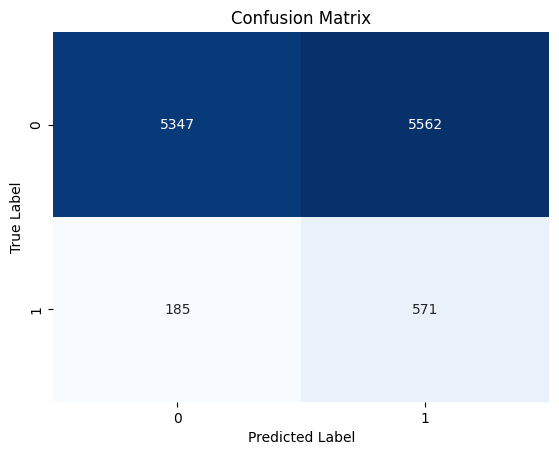

In [97]:
from sklearn.metrics import confusion_matrix
def display_confusion_matrix(y_pred,y_test):
    cm = confusion_matrix(y_test,y_pred)

    # Define the class labels
    classes = np.unique(y_test)

    # Create a confusion matrix plot using seaborn
    sb.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=classes, yticklabels=classes)

    # Set the axis labels and title
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Confusion Matrix')

    # Show the plot
    plt.show()

inputs, label = inputs_train_rus, label_train_rus

xgb_model = xgb.XGBClassifier(learning_rate=0.01, max_depth=3, n_estimators=200)
xgb_model.fit(inputs, label)


y_pred = xgb_model.predict(inputs_test)
display_confusion_matrix(y_pred,label_test)